# 다운로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,548 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120493 files and direc

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/학회/EDA/HP_T20_2020_1.CSV",encoding='cp949')
df2 = pd.read_csv("/content/drive/MyDrive/학회/EDA/HP_T20_2020_2.CSV",encoding='cp949')
df3 = pd.read_csv("/content/drive/MyDrive/학회/EDA/HP_T20_2020_3.CSV",encoding='cp949')

In [ ]:
po = pd.read_csv("/content/drive/MyDrive/학회/EDA/population.csv",encoding='utf-8')

In [ ]:
!gdown --id 1dW8ehjMwtyryhBegOkvbZ5BdGAvXp8-e #관내
!gdown --id 1HEdM6r_DgA9yzJi1t73D_31dyAPOyJhh #관외
indf =  pd.read_csv("/content/관내.csv",encoding='cp949')
outdf =  pd.read_csv("/content/관외.csv",encoding='cp949')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dW8ehjMwtyryhBegOkvbZ5BdGAvXp8-e
To: /content/관내.csv
100% 3.26k/3.26k [00:00<00:00, 11.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HEdM6r_DgA9yzJi1t73D_31dyAPOyJhh
To: /content/관외.csv
100% 3.08k/3.08k [00:00<00:00, 10.8MB/s]


In [ ]:
name  =  pd.read_csv("/content/drive/MyDrive/학회/EDA/name.csv",encoding='cp949')


In [ ]:
doc = pd.read_csv("/content/drive/MyDrive/학회/EDA/doctor.csv",encoding='utf-8')

In [ ]:
A = pd.read_csv("/content/drive/MyDrive/학회/EDA/의원표시과목별건수.csv",encoding='utf-8')

In [ ]:
me = pd.read_csv("/content/drive/MyDrive/학회/EDA/시도별 진료비 통계 2020.csv",encoding='cp949')

In [ ]:
!gdown --id 172LwxDLpKLJOeuMxXI7AP68aV7DGoXYB
ffinal = pd.read_csv("/content/지역별_과목별_재방문횟수및1일진료건수.csv",encoding='utf-8')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=172LwxDLpKLJOeuMxXI7AP68aV7DGoXYB
To: /content/지역별_과목별_재방문횟수및1일진료건수.csv
100% 32.7k/32.7k [00:00<00:00, 75.5MB/s]


In [ ]:
df = pd.concat([df1,df2,df3])


# 전처리

## 인구 전처리

In [ ]:

po = po.drop([0, 1])
po = po.drop(po.columns[1], axis=1)
po.columns = ['지역', '인구 수(단위: 천명)']



In [ ]:
po = po.drop(po.index[-2:], axis=0)
po.iloc[:, 1] = po.iloc[:, 1].str.replace(',', '').astype(int)



<ipython-input-14-21f12d90c984>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  po.iloc[:, 1] = po.iloc[:, 1].str.replace(',', '').astype(int)


In [ ]:
po.set_index('지역', inplace=True)

## 연령대, 성별, 지역 전처리

In [ ]:
df['부담금비율'] = np.where((df['심결요양급여비용총액'] != 0), df['심결본인부담금'] / df['심결요양급여비용총액'], np.nan)

In [ ]:
df['연령대코드'] = df['연령대코드'].replace({1: '10대미만', 2: '10대미만', 3: '10대', 4: '10대',5: '20대', 6: '20대', 7: '30대', 8: '30대',
                                   9:'40대', 10:'40대', 11:'50대',12:'50대', 13:'60대',14:'60대', 15: '70대', 16: '70대', 17: '80세이상', 18: '80세이상'})
df['성별코드'] = df['성별코드'].replace({1: '남', 2: '여'})
df['시도코드'] = df['시도코드'].replace({11: '서울', 26: '부산', 27:'대구', 28:'인천', 29:'광주', 30:'대전', 31: '울산',
                                 36:'세종', 41:'경기', 42:'강원', 43:'충북', 44:'충남',
                                 45:'전북', 46:'전남', 47:'경북', 48:'경남', 49:'제주'})

In [ ]:
df['진료과목코드'] = df['진료과목코드'].replace({1: '내과', 23: '가정의학과', 13:'이비인후과', 5:'정형외과', 14:'피부과', 12:'안과', 15: '비뇨의학과',
                                 3:'정신건강의학과', 9:'마취통증의학과', 2:'신경과', 11:'소아청소년과', 24:'응급의학과',
                                 10:'산부인과', 7:'심장혈관흉부외과', 21:'재활의학과', 6:'신경외과', 20:'결핵과',
                                 0:'일반의', 16:'영상의학과', 25:'직업환경의학과', 26:'예방의학과', 19:'진단검사의학과', 17:'방사선종양학과', 22:'핵의학과',
                                     8:'성형외과', 50:'구강악안면외과', 55:'치과보존과', 18:'병리과', 51:'치과보철과', 85:'침구과', 54:'치주과',4:'외과'})

In [ ]:
df['대분류'] = df['주상병코드'].str[0]

In [ ]:
df_ = df.drop_duplicates(subset='가입자 일련번호', keep='first')


## 질병코드 전처리

In [ ]:
name = name.drop_duplicates(subset='상병기호', keep='first')
dic= dict(zip(name['상병기호'], name['한글명']))

In [ ]:
df['병명'] = [dic[i] if i in dic else i for i in df['주상병코드']]
df['병명'] = df['병명'].replace({'F_' : '정신 및 행동장애', 'N_' :  '비뇨생식계통의 질환',
'Z_' : '건강상태 및 보건서비스 접촉에 영향을 주는 요인' ,
'O_' : '임신, 출산 및 산후기'})

## RI 전처리

In [ ]:
indf.columns = indf.iloc[0]
indf = indf[1:]
outdf.columns = outdf.iloc[0]
outdf = outdf[1:]

indf = indf.drop_duplicates(subset='시도별(1)', keep='first')
outdf = outdf.drop_duplicates(subset='시도별(1)', keep='first')
indf['진료실인원 (명)'] = indf['진료실인원 (명)'].astype(int)
outdf['진료실인원 (명)'] = outdf['진료실인원 (명)'].astype(int)
indf['RI']= indf['진료실인원 (명)'] / (indf['진료실인원 (명)'] + outdf['진료실인원 (명)'])

RI = indf[['시도별(1)','RI']]
ri_dict = dict(zip(RI['시도별(1)'], RI['RI']))
df['RI'] = [ri_dict[i] for i in df['시도코드']]

In [ ]:
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,...,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,부담금비율,대분류,병명,RI
0,2020,29,3724043,남,80세이상,경기,2020-12-21,3,내과,I109,...,0.15,11540,1500,10040,0,2021-12-28,0.129983,I,기타 및 상세불명의 원발성 고혈압,0.730487
1,2020,29,3495225,남,80세이상,경기,2020-12-14,3,내과,I109,...,0.15,11540,1500,10040,7,2021-12-28,0.129983,I,기타 및 상세불명의 원발성 고혈압,0.730487
2,2020,255,10615350,여,80세이상,경기,2020-04-20,3,내과,I109,...,0.15,11540,1500,10040,30,2021-12-28,0.129983,I,기타 및 상세불명의 원발성 고혈압,0.730487
3,2020,255,10616553,여,80세이상,경기,2020-04-16,3,내과,I109,...,0.15,11540,1500,10040,30,2021-12-28,0.129983,I,기타 및 상세불명의 원발성 고혈압,0.730487
4,2020,2406,3105303,여,80세이상,경기,2020-12-30,3,내과,I109,...,0.15,11540,1500,10040,0,2021-12-28,0.129983,I,기타 및 상세불명의 원발성 고혈압,0.730487


## me 전처리

In [ ]:
me = me.drop(me.columns[0], axis=1)


In [ ]:
me['명세서청구건수'] = me['명세서청구건수'].astype(int)
me['의사수'] = me['의사수'].astype(int)
me['건수/의사수'] = me['건수/의사수'].astype(int)
me['일일 처리건수'] = me['일일 처리건수'].astype(int)

KeyError: ignored

## 의사 수 전처리

In [ ]:
doc = doc.loc[doc['요양기관종별'] == '계', :]
doc.replace('-', pd.NA, inplace=True)
doc.fillna(0, inplace=True)  # NaN 값을 0으로 대체
doc.iloc[:, 2:] = doc.iloc[:, 2:].astype(str)

# 쉼표(,)를 제거하고 숫자로 변환
doc.iloc[:, 2:] = doc.iloc[:, 2:].applymap(lambda x: int(x.replace(',', '')))
new_row = doc.sum(axis=0)

# 새로운 행 추가
doc = doc.append(new_row, ignore_index=True)
doc.iloc[17,0] = '총합'
doc.iloc[17,1] = '계'


In [ ]:
doc.rename(columns={'심장혈관흉부외과': '흉부외과'}, inplace=True)

In [ ]:
doc

# 성별, 연령대, 지역별(기본 EDA)

In [ ]:
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,...,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,부담금비율,대분류
0,2020,29,3724043,남,80세이상,경기,2020-12-21,3,내과,I109,...,1,1,0.15,11540,1500,10040,0,2021-12-28,0.129983,I
1,2020,29,3495225,남,80세이상,경기,2020-12-14,3,내과,I109,...,1,1,0.15,11540,1500,10040,7,2021-12-28,0.129983,I
2,2020,255,10615350,여,80세이상,경기,2020-04-20,3,내과,I109,...,1,1,0.15,11540,1500,10040,30,2021-12-28,0.129983,I
3,2020,255,10616553,여,80세이상,경기,2020-04-16,3,내과,I109,...,1,1,0.15,11540,1500,10040,30,2021-12-28,0.129983,I
4,2020,2406,3105303,여,80세이상,경기,2020-12-30,3,내과,I109,...,1,1,0.15,11540,1500,10040,0,2021-12-28,0.129983,I


In [ ]:
df.shape

(11727248, 21)

In [ ]:
df_.shape

(1000000, 21)

## 성별 분류

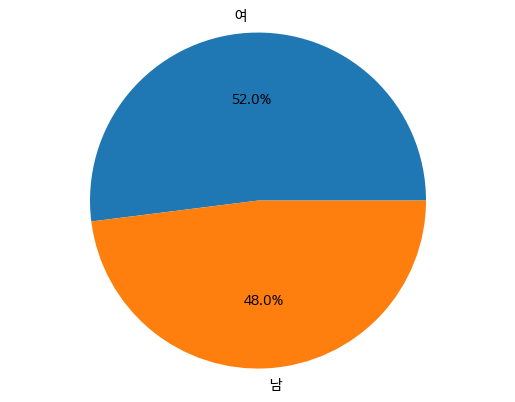

In [ ]:
# 파이 차트 그리기
code_counts = df_['성별코드'].value_counts()
plt.pie(code_counts, labels=code_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # 원형으로 보이도록 조정
plt.show()

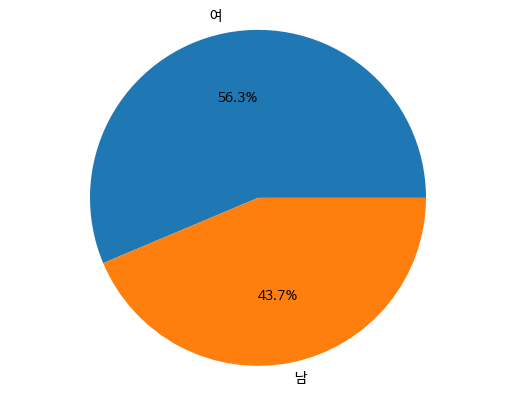

In [ ]:
# 파이 차트 그리기
code_counts = df['성별코드'].value_counts()
plt.pie(code_counts, labels=code_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # 원형으로 보이도록 조정
plt.show()

## 연령대

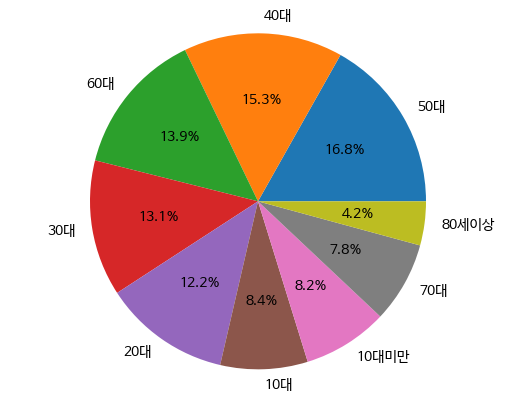

In [ ]:
code_counts = df_['연령대코드'].value_counts()

# 파이 차트 그리기
plt.pie(code_counts, labels=code_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # 원형으로 보이도록 조정
plt.show()

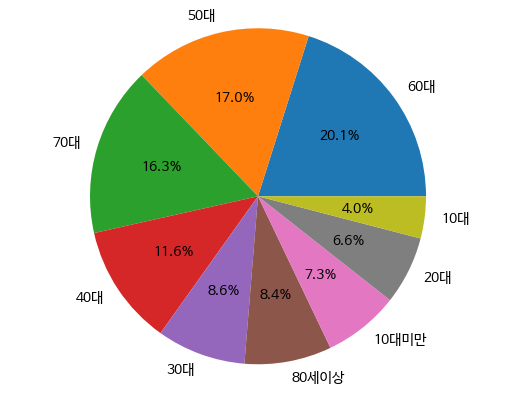

In [ ]:
code_counts = df['연령대코드'].value_counts()

# 파이 차트 그리기
plt.pie(code_counts, labels=code_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # 원형으로 보이도록 조정
plt.show()

In [ ]:
age1 = df[df['연령대코드'] == '10대'] #10대미만 없음
age2 = df[df['연령대코드'] == '20대']
age3 = df[df['연령대코드'] == '30대']
age4 = df[df['연령대코드'] == '40대']
age5 = df[df['연령대코드'] == '50대']
age6 = df[df['연령대코드'] == '60대']
age7 = df[df['연령대코드'] == '70대']
age8 = df[df['연령대코드'] == '80세이상']



In [ ]:
agelist = [['10대',age1], ['20대',age2], ['30대',age3],['40대', age4], ['50대', age5], ['60대', age6], ['70대', age7], ['80세이상', age8]]


## 지역별

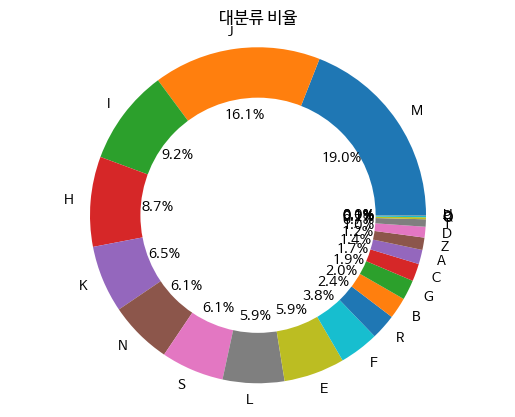

In [ ]:
code_counts = df['대분류'].value_counts()

# 파이 차트 그리기
plt.pie(code_counts, labels=code_counts.index, autopct='%1.1f%%')

# 레이블 위치 조정 (원의 중심에서 일정 거리 떨어진 곳에 레이블 표시)
plt.gca().add_artist(plt.Circle((0,0),0.7,fc='white'))

plt.axis('equal')  # 원형으로 보이도록 조정
plt.title('대분류 비율')
plt.show()

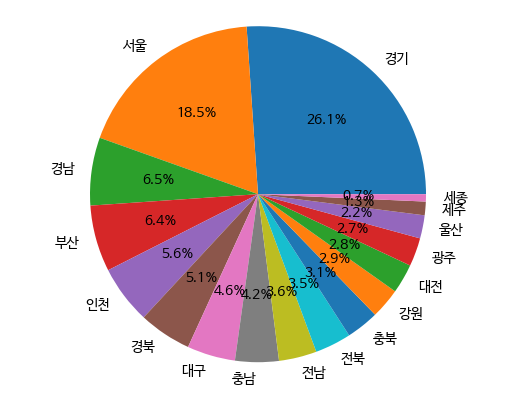

In [ ]:
code_counts = df_['시도코드'].value_counts()

# 파이 차트 그리기
plt.pie(code_counts, labels=code_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # 원형으로 보이도록 조정
plt.show()

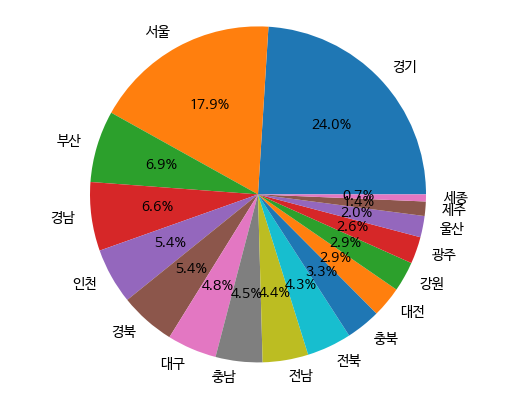

In [ ]:
code_counts = df['시도코드'].value_counts()

# 파이 차트 그리기
plt.pie(code_counts, labels=code_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # 원형으로 보이도록 조정
plt.show()

In [ ]:
local = {11: '서울', 26: '부산', 27:'대구', 28:'인천', 29:'광주', 30:'대전', 31: '울산',
                                 36:'세종', 41:'경기', 42:'강원', 43:'충북', 44:'충남',
                                 45:'전북', 46:'전남', 47:'경북', 48:'경남', 49:'제주'}
localname = list(local.values())

In [ ]:


local1 = df[df['시도코드'] == '서울'] #10대미만 없음
local2 = df[df['시도코드'] == '부산']
local3 = df[df['시도코드'] == '대구']
local4 = df[df['시도코드'] == '인천']
local5 = df[df['시도코드'] == '광주']
local6 = df[df['시도코드'] == '대전']
local7 = df[df['시도코드'] == '울산']


In [ ]:
local8 = df[df['시도코드'] == '세종']
local9 = df[df['시도코드'] == '경기']
local10 = df[df['시도코드'] == '강원']
local11 = df[df['시도코드'] == '충북']
local12 = df[df['시도코드'] == '충남']
local13 = df[df['시도코드'] == '전북']
local14 = df[df['시도코드'] == '전남']
local15 = df[df['시도코드'] == '경북']
local16 = df[df['시도코드'] == '경남']
local17 = df[df['시도코드'] == '제주']



In [ ]:
locallist = [local1, local2, local3, local4, local5, local6, local7, local8, local9, local10, local11, local12, local13, local14,
             local15, local16, local17]

# 보험금 부담율

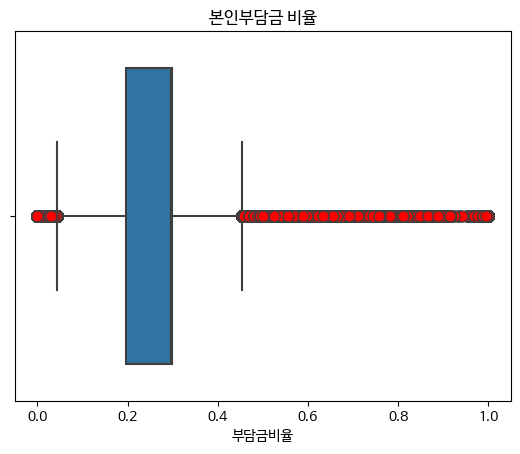

In [ ]:
import seaborn as sns
flierprops = dict(marker='o', markersize=8, markerfacecolor='red', linestyle='none')
sns.boxplot(data=df, x='부담금비율',flierprops=flierprops)
plt.xlabel('부담금비율')
plt.title('본인부담금 비율')
plt.show()


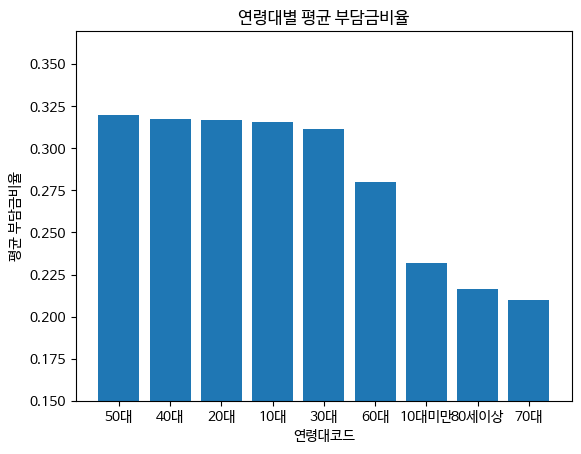

In [ ]:
 df.groupby('연령대코드')['부담금비율'].mean() #높을수록 본인부담 비율이 높다
 grouped_data = df.groupby('연령대코드')['부담금비율'].mean()
 grouped_data = grouped_data.sort_values(ascending=False)

# 막대 그래프로 그리기
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('연령대코드')
plt.ylabel('평균 부담금비율')
plt.title('연령대별 평균 부담금비율')
plt.ylim(0.15, max(grouped_data.values) + 0.05)
plt.show()


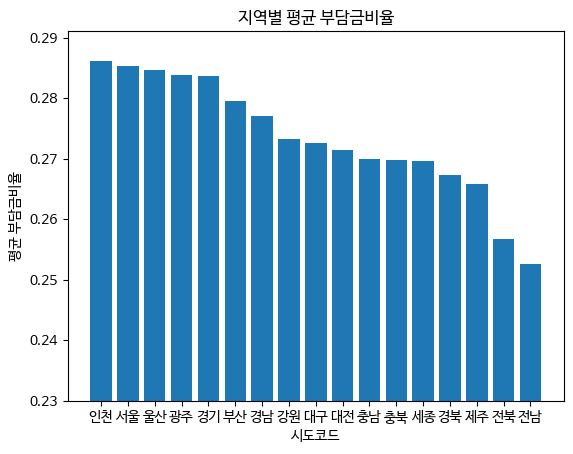

In [ ]:
df.groupby('시도코드')['부담금비율'].mean()

grouped_data = df.groupby('시도코드')['부담금비율'].mean()

# 값을 기준으로 내림차순으로 정렬
grouped_data = grouped_data.sort_values(ascending=False)

# 막대 그래프로 그리기
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('시도코드')
plt.ylabel('평균 부담금비율')
plt.ylim(0.23, max(grouped_data.values) + 0.005)
plt.title('지역별 평균 부담금비율')
plt.show()

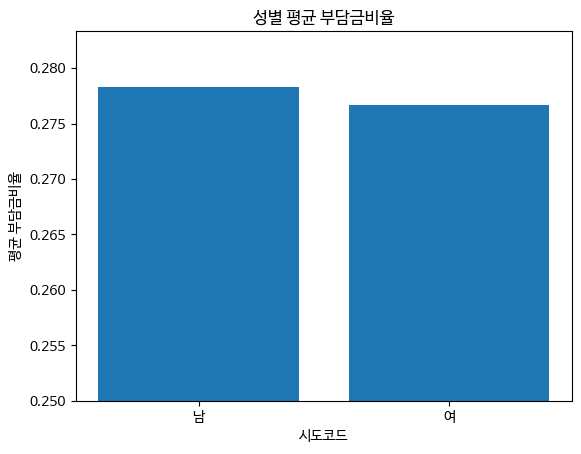

In [ ]:
df.groupby('성별코드')['부담금비율'].mean()

grouped_data = df.groupby('성별코드')['부담금비율'].mean()

# 값을 기준으로 내림차순으로 정렬
grouped_data = grouped_data.sort_values(ascending=False)

# 막대 그래프로 그리기
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('시도코드')
plt.ylabel('평균 부담금비율')
plt.ylim(0.25, max(grouped_data.values) + 0.005)
plt.title('성별 평균 부담금비율')
plt.show()

# 기준별 TOP5, RI, 보험금부담율

In [ ]:
def makeagedf(a): #a = i[1] = age1
  temp = pd.DataFrame(a['병명'].value_counts())

  mean_by_code = a.groupby('병명')['RI'].mean()
  mean_by_code_burden = a.groupby('병명')['부담금비율'].mean()

  temp['부담금비율 평균'] = mean_by_code_burden
  temp['RI 평균'] = mean_by_code

  return temp.head(5)

def makelocaldf(a): #a = j
  temp = pd.DataFrame(a['병명'].value_counts())

  mean_by_code = a.groupby('병명')['RI'].mean()
  mean_by_code_burden = a.groupby('병명')['부담금비율'].mean()

  temp['부담금비율 평균'] = mean_by_code_burden
  temp['RI 평균'] = mean_by_code

  return temp.head(5)


## 성별

남성

In [ ]:
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,...,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,부담금비율,대분류
0,2020,29,3724043,남,80세이상,경기,2020-12-21,3,내과,I109,...,1,1,0.15,11540,1500,10040,0,2021-12-28,0.129983,I
1,2020,29,3495225,남,80세이상,경기,2020-12-14,3,내과,I109,...,1,1,0.15,11540,1500,10040,7,2021-12-28,0.129983,I
2,2020,255,10615350,여,80세이상,경기,2020-04-20,3,내과,I109,...,1,1,0.15,11540,1500,10040,30,2021-12-28,0.129983,I
3,2020,255,10616553,여,80세이상,경기,2020-04-16,3,내과,I109,...,1,1,0.15,11540,1500,10040,30,2021-12-28,0.129983,I
4,2020,2406,3105303,여,80세이상,경기,2020-12-30,3,내과,I109,...,1,1,0.15,11540,1500,10040,0,2021-12-28,0.129983,I


In [ ]:

counts = pd.DataFrame(df[(df['성별코드'] == '남')&(df['연령대코드'] == '20대')]['병명'].value_counts())
counts.head(5)


,병명
정신 및 행동장애,22998
상세불명의 급성 기관지염,13004
상세불명 원인의 알레르기성 접촉피부염,4752
요추의 염좌 및 긴장,4275
상세불명의 알레르기비염,4213


In [ ]:

man_counts = pd.DataFrame(df[df['성별코드'] == '남']['병명'].value_counts())
man_counts['부담금비율 평균'] = mean_by_code_burden
man_counts['RI 평균'] = mean_by_code

# 결과 확인
man_counts.head(5)


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,354059,0.213107,0.769177
상세불명의 급성 기관지염,258772,0.245549,0.767981
정신 및 행동장애,165869,0.252736,0.773041
합병증을 동반하지 않은 2형 당뇨병,133902,0.237048,0.768544
만성 신장병(5기),89044,0.097916,0.769016


여성

In [ ]:
counts = pd.DataFrame(df[(df['성별코드'] == '여')&(df['연령대코드'] == '20대')]['병명'].value_counts())
counts.head(5)

,병명
비뇨생식계통의 질환,44979
정신 및 행동장애,30987
상세불명의 급성 기관지염,17976
건강상태 및 보건서비스 접촉에 영향을 주는 요인,10325
B_,7238


In [ ]:
#여성
woman_counts =  pd.DataFrame(df[df['성별코드'] == '여']['병명'].value_counts())
woman_counts['부담금비율 평균'] = mean_by_code_burden
woman_counts['RI 평균'] = mean_by_code
# 결과 확인
woman_counts.head(5)

,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,416805,0.213107,0.769177
상세불명의 급성 기관지염,303447,0.245549,0.767981
정신 및 행동장애,280214,0.252736,0.773041
비뇨생식계통의 질환,228142,0.336138,0.772885
양쪽 원발성 무릎관절증,116191,0.249935,0.771998


## 연령별

In [ ]:
d = pd.DataFrame()

for i in agelist:
    print(i[0])
    d = makeagedf(i[1])
    display(d)


10대


,병명,부담금비율 평균,RI 평균
상세불명의 급성 기관지염,42561,0.299658,0.767409
정신 및 행동장애,20997,0.256138,0.774291
상세불명의 알레르기비염,15208,0.302227,0.766768
근시,10052,0.301695,0.771415
재발성으로 명시되어 있지 않은 상세불명의 급성 편도염,9726,0.301294,0.768923


20대


,병명,부담금비율 평균,RI 평균
정신 및 행동장애,53985,0.248131,0.775493
비뇨생식계통의 질환,46242,0.326742,0.776778
상세불명의 급성 기관지염,30980,0.301882,0.772849
상세불명 원인의 알레르기성 접촉피부염,11948,0.299059,0.774612
건강상태 및 보건서비스 접촉에 영향을 주는 요인,10347,0.179102,0.763443


30대


,병명,부담금비율 평균,RI 평균
비뇨생식계통의 질환,57475,0.334739,0.772117
상세불명의 급성 기관지염,50014,0.301863,0.768483
정신 및 행동장애,47519,0.235506,0.774339
건강상태 및 보건서비스 접촉에 영향을 주는 요인,36275,0.201336,0.769024
"임신, 출산 및 산후기",16324,0.184787,0.768903


40대


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,60829,0.290893,0.768268
정신 및 행동장애,54258,0.236200,0.771453
비뇨생식계통의 질환,52866,0.348356,0.771579
상세불명의 급성 기관지염,52584,0.300348,0.768610
합병증을 동반하지 않은 2형 당뇨병,25523,0.302672,0.765025


50대


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,162761,0.283384,0.768363
합병증을 동반하지 않은 2형 당뇨병,59327,0.294586,0.769214
정신 및 행동장애,56099,0.243591,0.773830
상세불명의 급성 기관지염,49522,0.299520,0.770506
비뇨생식계통의 질환,44414,0.349941,0.771198


60대


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,234953,0.222555,0.770280
합병증을 동반하지 않은 2형 당뇨병,76690,0.240037,0.768889
정신 및 행동장애,62579,0.252833,0.774691
양쪽 원발성 무릎관절증,54450,0.273433,0.773989
상세불명의 급성 기관지염,51520,0.232321,0.772766


70대


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,192349,0.144928,0.770741
정신 및 행동장애,67772,0.255305,0.773627
척추협착_ 요추부,55986,0.204564,0.771051
합병증을 동반하지 않은 2형 당뇨병,55237,0.160082,0.769672
양쪽 원발성 무릎관절증,52196,0.214218,0.770984


80세이상


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,107346,0.153460,0.765753
정신 및 행동장애,78205,0.279741,0.768824
척추협착_ 요추부,30796,0.196846,0.766909
합병증을 동반하지 않은 2형 당뇨병,22965,0.162799,0.767397
양쪽 원발성 무릎관절증,22795,0.197136,0.768806


## 지역별

In [ ]:
for i, j in zip(localname, locallist):
    print(i)
    d = makelocaldf(j)
    display(d)
    print("")


서울


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,131365,0.208794,0.809714
상세불명의 급성 기관지염,87112,0.242423,0.809714
정신 및 행동장애,80865,0.250275,0.809714
비뇨생식계통의 질환,53788,0.335538,0.809714
합병증을 동반하지 않은 2형 당뇨병,38505,0.230498,0.809714



부산


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,48910,0.210870,0.84123
정신 및 행동장애,38210,0.246258,0.84123
상세불명의 급성 기관지염,33415,0.250546,0.84123
비뇨생식계통의 질환,17087,0.348020,0.84123
합병증을 동반하지 않은 2형 당뇨병,16578,0.240466,0.84123



대구


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,38121,0.205989,0.84819
상세불명의 급성 기관지염,28345,0.247204,0.84819
정신 및 행동장애,23074,0.248111,0.84819
합병증을 동반하지 않은 2형 당뇨병,11411,0.228688,0.84819
비뇨생식계통의 질환,10060,0.333691,0.84819



인천


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,43930,0.220603,0.735419
상세불명의 급성 기관지염,31879,0.242426,0.735419
정신 및 행동장애,22772,0.261968,0.735419
합병증을 동반하지 않은 2형 당뇨병,15215,0.231501,0.735419
비뇨생식계통의 질환,13479,0.351272,0.735419



광주


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,18943,0.206534,0.820575
상세불명의 급성 기관지염,14998,0.260929,0.820575
정신 및 행동장애,10824,0.255170,0.820575
합병증을 동반하지 않은 2형 당뇨병,7521,0.241583,0.820575
비뇨생식계통의 질환,5447,0.353850,0.820575



대전


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,21701,0.205167,0.814015
상세불명의 급성 기관지염,20690,0.249565,0.814015
정신 및 행동장애,13835,0.243156,0.814015
합병증을 동반하지 않은 2형 당뇨병,7262,0.218299,0.814015
비뇨생식계통의 질환,6389,0.328797,0.814015



울산


,병명,부담금비율 평균,RI 평균
상세불명의 급성 기관지염,13612,0.252914,0.819936
기타 및 상세불명의 원발성 고혈압,12950,0.231409,0.819936
정신 및 행동장애,8655,0.249230,0.819936
합병증을 동반하지 않은 2형 당뇨병,5673,0.265349,0.819936
비뇨생식계통의 질환,5456,0.325592,0.819936



세종


,병명,부담금비율 평균,RI 평균
상세불명의 급성 기관지염,6767,0.242532,0.579675
기타 및 상세불명의 원발성 고혈압,4152,0.205620,0.579675
정신 및 행동장애,2790,0.233964,0.579675
비뇨생식계통의 질환,1886,0.320518,0.579675
상세불명의 알레르기비염,1536,0.248541,0.579675



경기도


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,179205,0.222296,0.730487
상세불명의 급성 기관지염,149873,0.244070,0.730487
정신 및 행동장애,102766,0.251501,0.730487
비뇨생식계통의 질환,61781,0.335099,0.730487
합병증을 동반하지 않은 2형 당뇨병,60193,0.245827,0.730487



강원


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,28792,0.214551,0.768514
상세불명의 급성 기관지염,13605,0.232820,0.768514
정신 및 행동장애,13123,0.260749,0.768514
합병증을 동반하지 않은 2형 당뇨병,8536,0.246226,0.768514
척추협착_ 요추부,5381,0.268655,0.768514



충북


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,27560,0.211249,0.757375
상세불명의 급성 기관지염,19432,0.248116,0.757375
정신 및 행동장애,14101,0.256418,0.757375
합병증을 동반하지 않은 2형 당뇨병,9665,0.235650,0.757375
비뇨생식계통의 질환,7963,0.316702,0.757375



충남


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,36655,0.219727,0.715577
상세불명의 급성 기관지염,27493,0.244150,0.715577
정신 및 행동장애,20945,0.256313,0.715577
합병증을 동반하지 않은 2형 당뇨병,12583,0.234605,0.715577
비뇨생식계통의 질환,9854,0.334667,0.715577



전북


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,35633,0.197608,0.822079
상세불명의 급성 기관지염,19666,0.238632,0.822079
정신 및 행동장애,18484,0.247878,0.822079
척추협착_ 요추부,10687,0.219639,0.822079
양쪽 원발성 무릎관절증,9883,0.214298,0.822079



전남


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,37832,0.195483,0.701028
상세불명의 급성 기관지염,20935,0.250307,0.701028
정신 및 행동장애,17856,0.256741,0.701028
요통_ 요추부,12710,0.174814,0.701028
척추협착_ 요추부,12157,0.202559,0.701028



경북


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,48605,0.202775,0.70304
상세불명의 급성 기관지염,27672,0.241028,0.70304
정신 및 행동장애,23918,0.267767,0.70304
합병증을 동반하지 않은 2형 당뇨병,15084,0.226624,0.70304
척추협착_ 요추부,10810,0.234196,0.70304



경남


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,47951,0.223408,0.776015
상세불명의 급성 기관지염,38806,0.255230,0.776015
정신 및 행동장애,27629,0.255784,0.776015
합병증을 동반하지 않은 2형 당뇨병,16209,0.250168,0.776015
비뇨생식계통의 질환,14001,0.343096,0.776015



제주


,병명,부담금비율 평균,RI 평균
기타 및 상세불명의 원발성 고혈압,8559,0.219750,0.842421
상세불명의 급성 기관지염,7919,0.237147,0.842421
정신 및 행동장애,6236,0.252949,0.842421
비뇨생식계통의 질환,3305,0.321343,0.842421
양쪽 원발성 무릎관절증,2606,0.235801,0.842421


# 지역별 과목 수요

## 지역별 진료과목 비율

In [ ]:
def makehosdf(a):
    temp = pd.DataFrame(a)
    temp.rename(columns={'진료과목코드': '진료횟수'}, inplace=True)
    temp['비율'] = round(temp['진료횟수'] / temp['진료횟수'].sum(axis=0), 3) * 100
    temp = temp[temp['비율'] != 0]

    return temp


In [ ]:
#지역별 진료과목 비율
t = pd.DataFrame()

for i, j in zip(localname, locallist):
    print(i)
    t = makehosdf(j['진료과목코드'].value_counts())
    display(t)
    print("")





서울


,진료횟수,비율
내과,690956,32.9
정형외과,368529,17.5
이비인후과,187679,8.9
안과,160242,7.6
피부과,128123,6.1
산부인과,88622,4.2
정신건강의학과,72597,3.5
비뇨의학과,59080,2.8
가정의학과,57836,2.8
외과,57476,2.7



부산


,진료횟수,비율
내과,275131,34.0
정형외과,139695,17.3
안과,62521,7.7
이비인후과,51803,6.4
피부과,41106,5.1
소아청소년과,36839,4.5
정신건강의학과,31623,3.9
외과,27703,3.4
산부인과,26559,3.3
비뇨의학과,23826,2.9



대구


,진료횟수,비율
내과,181862,32.5
정형외과,101193,18.1
이비인후과,49274,8.8
안과,41855,7.5
피부과,27385,4.9
소아청소년과,21168,3.8
비뇨의학과,18819,3.4
정신건강의학과,18734,3.3
외과,17910,3.2
산부인과,15814,2.8



인천


,진료횟수,비율
내과,213984,33.9
정형외과,112634,17.9
이비인후과,55678,8.8
안과,42253,6.7
피부과,35245,5.6
산부인과,23528,3.7
외과,23086,3.7
정신건강의학과,19602,3.1
소아청소년과,18109,2.9
가정의학과,16682,2.6



광주


,진료횟수,비율
내과,93799,30.8
정형외과,44250,14.5
이비인후과,32569,10.7
안과,19955,6.6
피부과,19215,6.3
소아청소년과,16995,5.6
외과,12687,4.2
산부인과,10529,3.5
가정의학과,10450,3.4
정신건강의학과,8635,2.8



대전


,진료횟수,비율
내과,112211,32.5
정형외과,56831,16.4
이비인후과,26438,7.6
안과,23933,6.9
피부과,18867,5.5
소아청소년과,18554,5.4
정신건강의학과,12622,3.7
외과,11727,3.4
비뇨의학과,10849,3.1
가정의학과,10730,3.1



울산


,진료횟수,비율
내과,81599,34.0
정형외과,42724,17.8
안과,18480,7.7
이비인후과,18315,7.6
피부과,12959,5.4
소아청소년과,9987,4.2
산부인과,8688,3.6
외과,7405,3.1
정신건강의학과,7303,3.0
비뇨의학과,6935,2.9



세종


,진료횟수,비율
내과,25305,32.0
정형외과,12974,16.4
이비인후과,10748,13.6
안과,5162,6.5
피부과,4305,5.4
산부인과,2886,3.6
소아청소년과,2845,3.6
비뇨의학과,2499,3.2
정신건강의학과,2465,3.1
외과,2207,2.8



경기


,진료횟수,비율
내과,932189,33.1
정형외과,476062,16.9
이비인후과,273100,9.7
안과,202782,7.2
피부과,154699,5.5
산부인과,105497,3.7
소아청소년과,93890,3.3
외과,91472,3.2
정신건강의학과,90389,3.2
가정의학과,78744,2.8



강원


,진료횟수,비율
내과,119790,35.4
정형외과,62513,18.5
이비인후과,26982,8.0
안과,20897,6.2
피부과,14794,4.4
외과,11542,3.4
정신건강의학과,11256,3.3
비뇨의학과,9966,2.9
가정의학과,9310,2.7
산부인과,9260,2.7



충북


,진료횟수,비율
내과,129784,33.1
정형외과,85094,21.7
이비인후과,27822,7.1
안과,26138,6.7
피부과,19519,5.0
외과,13179,3.4
비뇨의학과,12264,3.1
정신건강의학과,11923,3.0
산부인과,11731,3.0
소아청소년과,11010,2.8



충남


,진료횟수,비율
내과,167713,31.7
정형외과,101465,19.2
이비인후과,40264,7.6
안과,32974,6.2
피부과,23537,4.5
가정의학과,22680,4.3
외과,22414,4.2
소아청소년과,17819,3.4
정신건강의학과,17070,3.2
산부인과,16652,3.2



전북


,진료횟수,비율
내과,162292,32.2
정형외과,105061,20.8
이비인후과,32355,6.4
안과,31599,6.3
피부과,23049,4.6
가정의학과,21672,4.3
외과,19987,4.0
소아청소년과,16994,3.4
정신건강의학과,14390,2.9
비뇨의학과,14235,2.8



전남


,진료횟수,비율
내과,159803,31.1
정형외과,107871,21.0
외과,31297,6.1
안과,30941,6.0
이비인후과,28395,5.5
가정의학과,26582,5.2
피부과,22852,4.4
소아청소년과,17547,3.4
신경외과,14597,2.8
비뇨의학과,13064,2.5



경북


,진료횟수,비율
내과,205521,32.7
정형외과,120690,19.2
이비인후과,44812,7.1
안과,41332,6.6
피부과,29345,4.7
외과,24796,3.9
비뇨의학과,21392,3.4
소아청소년과,20824,3.3
가정의학과,19912,3.2
정신건강의학과,17823,2.8



경남


,진료횟수,비율
내과,257467,33.2
정형외과,141361,18.2
안과,57326,7.4
이비인후과,45471,5.9
피부과,42686,5.5
소아청소년과,37152,4.8
외과,26834,3.5
산부인과,23845,3.1
신경외과,22924,3.0
가정의학과,21323,2.8



제주


,진료횟수,비율
내과,52731,32.5
정형외과,30913,19.1
이비인후과,13451,8.3
안과,12536,7.7
피부과,8128,5.0
산부인과,5613,3.5
정신건강의학과,5371,3.3
소아청소년과,5347,3.3
가정의학과,4611,2.8
비뇨의학과,4374,2.7


## 인구 1000명당 과목별 의사수 비율(doc2)

In [ ]:
doc.set_index('시도', inplace=True)

In [ ]:
doc = doc.drop(doc.columns[0], axis=1)

In [ ]:
# doc와 po 데이터프레임을 인덱스를 기준으로 합치기
merged_df = doc.merge(po[['인구 수(단위: 천명)']], left_index=True, right_index=True)

# doc2 데이터프레임 생성
doc2 = merged_df.apply(lambda row: (row / row['인구 수(단위: 천명)'])*10, axis=1)



In [ ]:
# '합계' 열의 값으로 나머지 열을 나누어 'doc2'에 저장
for idx in doc2.index:
    total = doc2.loc[idx, '합계']
    doc2.loc[idx, doc2.columns != '합계'] = round((doc2.loc[idx, doc2.columns != '합계'] / total)*100,2)



In [ ]:
doc2

,합계,내과,신경과,정신건강의학과,외과,정형외과,신경외과,심장혈관흉부외과,성형외과,마취통증의학과,...,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과,인구 수(단위: 천명)
서울,15.285382,19.03,2.13,3.93,6.24,6.44,2.73,1.26,4.45,5.91,...,1.31,1.14,0.07,2.38,0.37,7.59,1.59,0.34,0.19,65.42
부산,15.683800,20.66,2.17,4.36,7.34,7.71,3.20,1.23,2.40,5.35,...,1.02,0.97,0.04,2.41,0.31,7.46,1.30,0.59,0.18,63.76
인천,15.700361,19.54,1.98,3.98,7.31,8.21,3.82,1.26,1.47,4.99,...,0.87,1.10,0.05,2.67,0.23,7.31,3.01,1.08,0.11,63.69
대구,18.122942,19.89,2.91,3.96,7.41,7.31,3.55,1.05,2.64,5.27,...,1.13,1.01,0.02,2.30,0.42,6.82,1.17,0.38,0.34,55.18
광주,10.464092,19.46,2.04,3.85,7.25,7.54,3.82,1.17,1.59,5.73,...,0.81,1.20,0.00,2.40,0.26,8.16,2.72,0.32,0.16,95.56
대전,10.785094,18.95,2.65,4.36,6.24,7.61,3.05,1.64,2.11,5.13,...,0.94,0.74,0.10,3.69,0.23,8.15,1.88,0.81,0.13,92.72
울산,14.393657,19.18,1.88,3.82,7.58,7.19,3.43,1.43,2.07,5.18,...,0.71,0.91,0.00,1.75,0.19,6.93,2.27,2.01,0.45,69.48
경기,144.048522,18.77,2.05,4.20,6.49,8.11,3.24,1.07,1.26,5.25,...,0.96,1.01,0.08,2.75,0.21,7.94,2.44,0.54,0.17,6.94
강원,242.555556,19.51,1.83,4.44,8.47,7.70,4.31,1.51,1.79,5.82,...,0.73,1.10,0.09,2.57,0.18,6.37,3.34,0.55,0.27,4.12
충북,97.045455,16.96,2.25,5.39,7.68,8.06,4.03,1.64,1.31,5.90,...,0.47,0.84,0.00,2.67,0.09,9.18,2.39,1.36,0.09,10.30


## [지역별 진료과목 비율/지역별 인구 10000명 당 과목별 의사수의 비율]

In [ ]:
def makeperdf(a):
    temp = pd.DataFrame(a)
    temp.rename(columns={'진료과목코드': '진료횟수'}, inplace=True)
    temp['수요'] = round(temp['진료횟수'] / temp['진료횟수'].sum(axis=0), 3) * 100

    common_cols = list(set(doc2.columns) & set(temp.index))
    result = doc2.loc[i, common_cols]

    temp['의사비율'] = result
    temp['최종비율'] = round((temp['수요'] / temp['의사비율']),3)

    return temp


p = pd.DataFrame()

for i, j in zip(localname, locallist):
    print(i)
    p = makeperdf(j['진료과목코드'].value_counts())
    display(p)
    print("")



######
#최종비율이 1 이상: 공급에 비해 수요가 많다

서울


,진료횟수,수요,의사비율,최종비율
내과,690956,32.9,19.03,1.729
정형외과,368529,17.5,6.44,2.717
이비인후과,187679,8.9,4.49,1.982
안과,160242,7.6,4.41,1.723
피부과,128123,6.1,3.61,1.690
산부인과,88622,4.2,6.37,0.659
정신건강의학과,72597,3.5,3.93,0.891
비뇨의학과,59080,2.8,2.90,0.966
가정의학과,57836,2.8,7.59,0.369
외과,57476,2.7,6.24,0.433



부산


,진료횟수,수요,의사비율,최종비율
내과,275131,34.0,20.66,1.646
정형외과,139695,17.3,7.71,2.244
안과,62521,7.7,4.36,1.766
이비인후과,51803,6.4,4.70,1.362
피부과,41106,5.1,2.30,2.217
소아청소년과,36839,4.5,6.10,0.738
정신건강의학과,31623,3.9,4.36,0.894
외과,27703,3.4,7.34,0.463
산부인과,26559,3.3,6.66,0.495
비뇨의학과,23826,2.9,2.84,1.021



대구


,진료횟수,수요,의사비율,최종비율
내과,181862,32.5,19.89,1.634
정형외과,101193,18.1,7.31,2.476
이비인후과,49274,8.8,4.36,2.018
안과,41855,7.5,4.48,1.674
피부과,27385,4.9,2.60,1.885
소아청소년과,21168,3.8,6.70,0.567
비뇨의학과,18819,3.4,3.19,1.066
정신건강의학과,18734,3.3,3.96,0.833
외과,17910,3.2,7.41,0.432
산부인과,15814,2.8,6.72,0.417



인천


,진료횟수,수요,의사비율,최종비율
내과,213984,33.9,19.54,1.735
정형외과,112634,17.9,8.21,2.180
이비인후과,55678,8.8,4.60,1.913
안과,42253,6.7,3.77,1.777
피부과,35245,5.6,2.12,2.642
산부인과,23528,3.7,6.81,0.543
외과,23086,3.7,7.31,0.506
정신건강의학과,19602,3.1,3.98,0.779
소아청소년과,18109,2.9,6.85,0.423
가정의학과,16682,2.6,7.31,0.356



광주


,진료횟수,수요,의사비율,최종비율
내과,93799,30.8,19.46,1.583
정형외과,44250,14.5,7.54,1.923
이비인후과,32569,10.7,4.37,2.449
안과,19955,6.6,3.53,1.870
피부과,19215,6.3,2.65,2.377
소아청소년과,16995,5.6,7.19,0.779
외과,12687,4.2,7.25,0.579
산부인과,10529,3.5,6.96,0.503
가정의학과,10450,3.4,8.16,0.417
정신건강의학과,8635,2.8,3.85,0.727



대전


,진료횟수,수요,의사비율,최종비율
내과,112211,32.5,18.95,1.715
정형외과,56831,16.4,7.61,2.155
이비인후과,26438,7.6,4.19,1.814
안과,23933,6.9,3.92,1.760
피부과,18867,5.5,2.42,2.273
소아청소년과,18554,5.4,6.91,0.781
정신건강의학과,12622,3.7,4.36,0.849
외과,11727,3.4,6.24,0.545
비뇨의학과,10849,3.1,2.72,1.140
가정의학과,10730,3.1,8.15,0.380



울산


,진료횟수,수요,의사비율,최종비율
내과,81599,34.0,19.18,1.773
정형외과,42724,17.8,7.19,2.476
안과,18480,7.7,4.21,1.829
이비인후과,18315,7.6,4.41,1.723
피부과,12959,5.4,1.88,2.872
소아청소년과,9987,4.2,7.26,0.579
산부인과,8688,3.6,7.45,0.483
외과,7405,3.1,7.58,0.409
정신건강의학과,7303,3.0,3.82,0.785
비뇨의학과,6935,2.9,3.24,0.895



세종


,진료횟수,수요,의사비율,최종비율
내과,25305,32.0,16.18,1.978
정형외과,12974,16.4,6.37,2.575
이비인후과,10748,13.6,6.62,2.054
안과,5162,6.5,3.68,1.766
피부과,4305,5.4,2.21,2.443
산부인과,2886,3.6,7.11,0.506
소아청소년과,2845,3.6,13.48,0.267
비뇨의학과,2499,3.2,3.68,0.870
정신건강의학과,2465,3.1,4.17,0.743
외과,2207,2.8,4.90,0.571



경기


,진료횟수,수요,의사비율,최종비율
내과,932189,33.1,18.77,1.763
정형외과,476062,16.9,8.11,2.084
이비인후과,273100,9.7,5.07,1.913
안과,202782,7.2,3.56,2.022
피부과,154699,5.5,2.54,2.165
산부인과,105497,3.7,6.87,0.539
소아청소년과,93890,3.3,7.97,0.414
외과,91472,3.2,6.49,0.493
정신건강의학과,90389,3.2,4.20,0.762
가정의학과,78744,2.8,7.94,0.353



강원


,진료횟수,수요,의사비율,최종비율
내과,119790,35.4,19.51,1.814
정형외과,62513,18.5,7.70,2.403
이비인후과,26982,8.0,3.94,2.030
안과,20897,6.2,3.57,1.737
피부과,14794,4.4,1.69,2.604
외과,11542,3.4,8.47,0.401
정신건강의학과,11256,3.3,4.44,0.743
비뇨의학과,9966,2.9,2.52,1.151
가정의학과,9310,2.7,6.37,0.424
산부인과,9260,2.7,6.69,0.404



충북


,진료횟수,수요,의사비율,최종비율
내과,129784,33.1,16.96,1.952
정형외과,85094,21.7,8.06,2.692
이비인후과,27822,7.1,4.22,1.682
안과,26138,6.7,3.70,1.811
피부과,19519,5.0,1.92,2.604
외과,13179,3.4,7.68,0.443
비뇨의학과,12264,3.1,3.09,1.003
정신건강의학과,11923,3.0,5.39,0.557
산부인과,11731,3.0,6.70,0.448
소아청소년과,11010,2.8,6.14,0.456



충남


,진료횟수,수요,의사비율,최종비율
내과,167713,31.7,17.98,1.763
정형외과,101465,19.2,7.43,2.584
이비인후과,40264,7.6,3.77,2.016
안과,32974,6.2,3.81,1.627
피부과,23537,4.5,1.71,2.632
가정의학과,22680,4.3,8.95,0.480
외과,22414,4.2,9.03,0.465
소아청소년과,17819,3.4,6.78,0.501
정신건강의학과,17070,3.2,4.84,0.661
산부인과,16652,3.2,7.47,0.428



전북


,진료횟수,수요,의사비율,최종비율
내과,162292,32.2,19.68,1.636
정형외과,105061,20.8,7.36,2.826
이비인후과,32355,6.4,3.31,1.934
안과,31599,6.3,3.65,1.726
피부과,23049,4.6,2.13,2.160
가정의학과,21672,4.3,9.86,0.436
외과,19987,4.0,8.34,0.480
소아청소년과,16994,3.4,6.45,0.527
정신건강의학과,14390,2.9,4.46,0.650
비뇨의학과,14235,2.8,2.46,1.138



전남


,진료횟수,수요,의사비율,최종비율
내과,159803,31.1,18.06,1.722
정형외과,107871,21.0,7.68,2.734
외과,31297,6.1,9.63,0.633
안과,30941,6.0,2.93,2.048
이비인후과,28395,5.5,3.51,1.567
가정의학과,26582,5.2,9.17,0.567
피부과,22852,4.4,1.29,3.411
소아청소년과,17547,3.4,6.05,0.562
신경외과,14597,2.8,3.74,0.749
비뇨의학과,13064,2.5,3.12,0.801



경북


,진료횟수,수요,의사비율,최종비율
내과,205521,32.7,17.07,1.916
정형외과,120690,19.2,7.76,2.474
이비인후과,44812,7.1,4.09,1.736
안과,41332,6.6,3.90,1.692
피부과,29345,4.7,1.29,3.643
외과,24796,3.9,8.90,0.438
비뇨의학과,21392,3.4,3.08,1.104
소아청소년과,20824,3.3,6.41,0.515
가정의학과,19912,3.2,8.61,0.372
정신건강의학과,17823,2.8,5.41,0.518



경남


,진료횟수,수요,의사비율,최종비율
내과,257467,33.2,19.88,1.670
정형외과,141361,18.2,7.53,2.417
안과,57326,7.4,3.53,2.096
이비인후과,45471,5.9,4.06,1.453
피부과,42686,5.5,1.73,3.179
소아청소년과,37152,4.8,7.45,0.644
외과,26834,3.5,7.53,0.465
산부인과,23845,3.1,6.52,0.475
신경외과,22924,3.0,3.96,0.758
가정의학과,21323,2.8,6.56,0.427



제주


,진료횟수,수요,의사비율,최종비율
내과,52731,32.5,15.89,2.045
정형외과,30913,19.1,7.02,2.721
이비인후과,13451,8.3,4.29,1.935
안과,12536,7.7,3.80,2.026
피부과,8128,5.0,1.75,2.857
산부인과,5613,3.5,6.14,0.570
정신건강의학과,5371,3.3,3.80,0.868
소아청소년과,5347,3.3,7.12,0.463
가정의학과,4611,2.8,9.36,0.299
비뇨의학과,4374,2.7,2.73,0.989


In [ ]:
common_cols = list(set(doc2.columns) & set(t.index))
result = doc2.loc['서울', common_cols]
result


소아청소년과       5.19
정신건강의학과      3.93
신경과          2.13
응급의학과        1.59
가정의학과        7.59
이비인후과        4.49
내과          19.03
피부과          3.61
방사선종양학과      0.49
정형외과         6.44
성형외과         4.45
외과           6.24
비뇨의학과        2.90
심장혈관흉부외과     1.26
신경외과         2.73
재활의학과        2.38
영상의학과        5.42
안과           4.41
마취통증의학과      5.91
산부인과         6.37
Name: 서울, dtype: float64

# 수요공급

## 진료과목(수요)

In [ ]:
df['진료과목코드'].unique()

array(['내과', '가정의학과', '이비인후과', '정형외과', '피부과', '외과', '안과', '비뇨의학과',
       '정신건강의학과', '마취통증의학과', '신경과', '소아청소년과', '응급의학과', '산부인과', '심장혈관흉부외과',
       '재활의학과', '신경외과', '결핵과', '일반의', '영상의학과', '직업환경의학과', '예방의학과',
       '진단검사의학과', '방사선종양학과', '핵의학과', '성형외과', '구강악안면외과', '치과보존과', '병리과',
       '치과보철과', '침구과', '치주과'], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

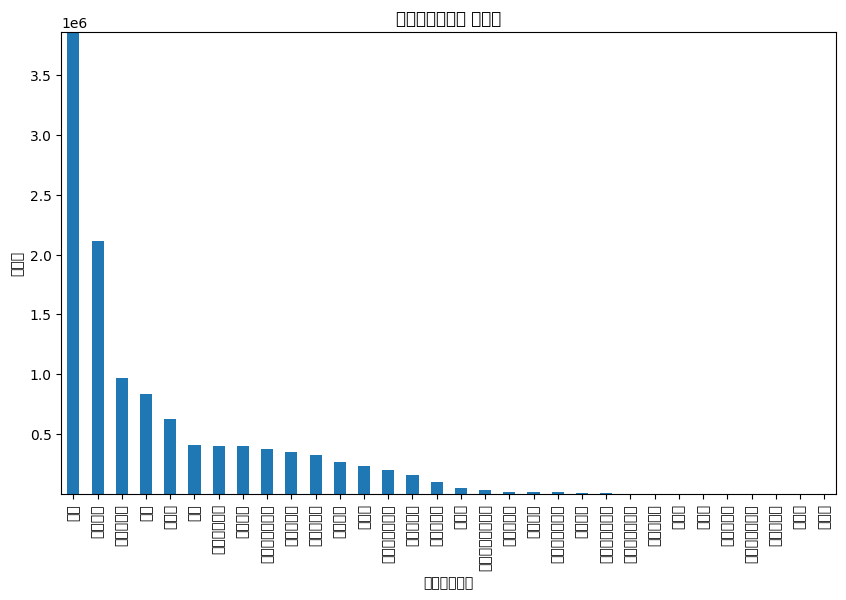

In [ ]:
value_counts = df['진료과목코드'].value_counts()

plt.figure(figsize=(10, 6))  # 그래프 크기 설정 (선택 사항)
value_counts.plot(kind='bar')
plt.ylim(1, max(value_counts)+1000)
plt.xlabel('진료과목코드')
plt.ylabel('빈도수')
plt.title('진료과목코드별 빈도수')
plt.show()

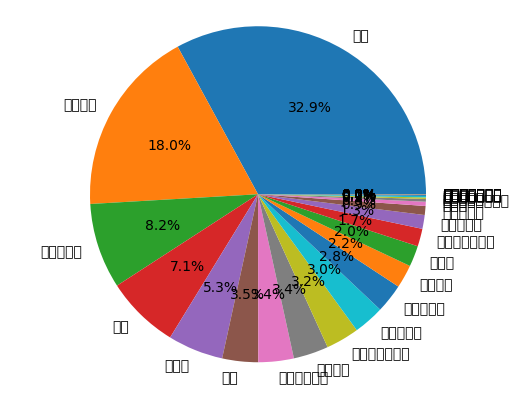

In [ ]:
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # 원형으로 보이도록 조정
plt.show()

In [ ]:
su = pd.DataFrame(value_counts)
su.rename(columns={'진료과목코드':'진료횟수'},inplace=True)


In [ ]:
su['비율'] = round(su['진료횟수'] / su['진료횟수'].sum(axis=0),2)
su

,진료횟수,비율
내과,3862137,0.33
정형외과,2109860,0.18
이비인후과,965156,0.08
안과,830926,0.07
피부과,625814,0.05
외과,404613,0.03
소아청소년과,399236,0.03
산부인과,395229,0.03
정신건강의학과,375525,0.03
가정의학과,346533,0.03


## 진료과목 (공급)

In [ ]:
temp = doc.iloc[-1,3:]
print(temp)

내과          16921
신경과          1953
정신건강의학과      3794
외과           6275
정형외과         6574
신경외과         2913
심장혈관흉부외과     1140
성형외과         2126
마취통증의학과      4888
산부인과         5906
소아청소년과       5840
안과           3510
이비인후과        3977
피부과          2290
비뇨의학과        2610
영상의학과        3910
방사선종양학과       321
병리과           885
진단검사의학과       907
결핵과            57
재활의학과        2235
핵의학과          247
가정의학과        6935
응급의학과        1913
직업환경의학과       560
예방의학과         190
Name: 17, dtype: object


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

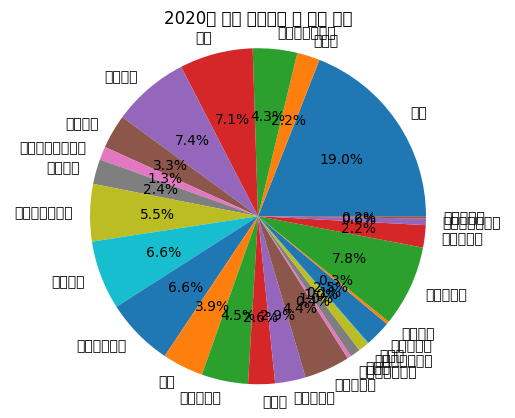

In [ ]:
plt.pie(temp, labels=temp.index, autopct='%1.1f%%')
plt.axis('equal')  # 원형으로 보이도록 조정
plt.title('2020년 전국 진료과목 별 의사 비율')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

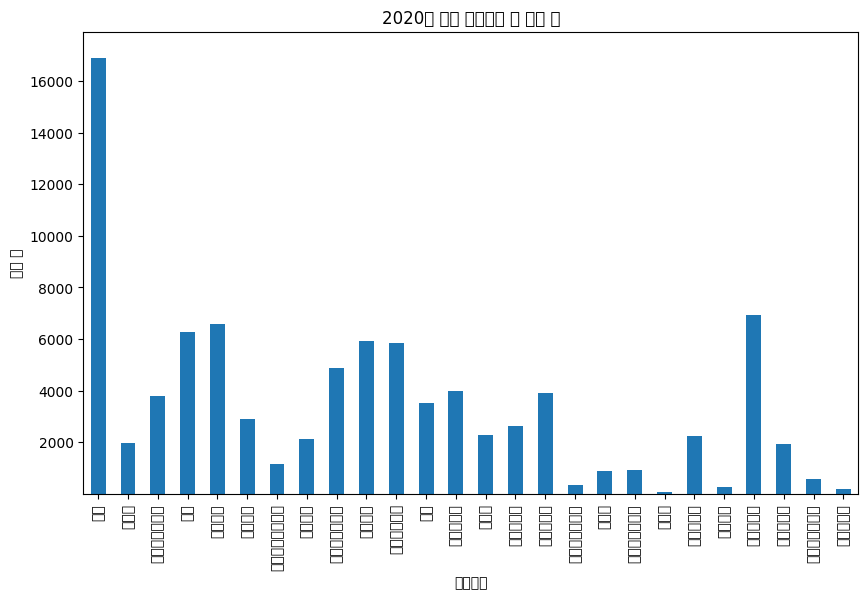

In [ ]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정 (선택 사항)
temp.plot(kind='bar')
plt.ylim(1, max(temp)+1000)
plt.xlabel('진료과목')
plt.ylabel('의사 수')
plt.title('2020년 전국 진료과목 별 의사 수')
plt.show()

In [ ]:
gong = pd.DataFrame(temp)
gong.rename(columns={17:'의사 수'},inplace=True)



In [ ]:
gong['의사 수'] = pd.to_numeric(gong['의사 수'])
gong['비율'] = round(gong['의사 수'] / gong['의사 수'].sum(axis=0),2)

gong

,의사 수,비율
내과,16921,0.19
신경과,1953,0.02
정신건강의학과,3794,0.04
외과,6275,0.07
정형외과,6574,0.07
신경외과,2913,0.03
심장혈관흉부외과,1140,0.01
성형외과,2126,0.02
마취통증의학과,4888,0.05
산부인과,5906,0.07


## 수요공급 비교

In [ ]:

merged_df = pd.concat([su, gong], axis=1)
merged_df = merged_df.drop(merged_df.columns[[0,2]], axis=1)
merged_df.columns = ['수요비율', '공급비율']



In [ ]:
merged_df['수요대비 공급'] = round(merged_df['공급비율']/merged_df['수요비율'],2)
merged_df

,수요비율,공급비율,수요대비 공급
내과,0.33,0.19,0.58
정형외과,0.18,0.07,0.39
이비인후과,0.08,0.04,0.50
안과,0.07,0.04,0.57
피부과,0.05,0.03,0.60
외과,0.03,0.07,2.33
소아청소년과,0.03,0.07,2.33
산부인과,0.03,0.07,2.33
정신건강의학과,0.03,0.04,1.33
가정의학과,0.03,0.08,2.67


In [ ]:
A.set_index('구분', inplace=True)

In [ ]:
A

,2020년
구분,
전체,"479,588"
내과,"94,049"
신경과,"3,139"
정신건강의학과,"12,420"
외과,"11,037"
정형외과,"54,286"
신경외과,"9,600"
흉부외과,365
성형외과,400


In [ ]:
doc

,시도,요양기관종별,합계,내과,신경과,정신건강의학과,외과,정형외과,신경외과,심장혈관흉부외과,...,방사선종양학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
0,서울,계,24290,4623,518,955,1515,1564,663,306,...,120,318,276,18,577,91,1844,387,82,46
1,부산,계,6835,1412,148,298,502,527,219,84,...,28,70,66,3,165,21,510,89,40,12
2,인천,계,4349,850,86,173,318,357,166,55,...,14,38,48,2,116,10,318,131,47,5
3,대구,계,4953,985,144,196,367,362,176,52,...,20,56,50,1,114,21,338,58,19,17
4,광주,계,3089,601,63,119,224,233,118,36,...,3,25,37,0,74,8,252,84,10,5
5,대전,계,2981,565,79,130,186,227,91,49,...,11,28,22,3,110,7,243,56,24,4
6,울산,계,1543,296,29,59,117,111,53,22,...,3,11,14,0,27,3,107,35,31,7
7,경기,계,19000,3566,389,798,1233,1540,616,204,...,60,182,192,16,523,40,1508,463,103,33
8,강원,계,2183,426,40,97,185,168,94,33,...,11,16,24,2,56,4,139,73,12,6
9,충북,계,2135,362,48,115,164,172,86,35,...,4,10,18,0,57,2,196,51,29,2


In [ ]:
B = pd.DataFrame(doc.iloc[17,:])
B

,17
시도,총합
요양기관종별,계
합계,88877
내과,16921
신경과,1953
정신건강의학과,3794
외과,6275
정형외과,6574
신경외과,2913
심장혈관흉부외과,1140


In [ ]:
C=B.merge(A[['2020년']], left_index=True, right_index=True)
C.columns = ['의사수', '진료건수']
C.iloc[:, 1] = C.iloc[:, 1].str.replace(',', '').astype(int)

<ipython-input-93-a3c5fa43a2be>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  C.iloc[:, 1] = C.iloc[:, 1].str.replace(',', '').astype(int)


In [ ]:
C['진료수/의사'] = C['진료건수'] / C['의사수']
C.sort_values('진료수/의사')


,의사수,진료건수,진료수/의사
진단검사의학과,907,28,0.030871
성형외과,2126,400,0.188147
영상의학과,3910,1012,0.258824
결핵과,57,23,0.403509
신경과,1953,3139,1.607271
외과,6275,11037,1.758884
가정의학과,6935,12503,1.802884
산부인과,5906,13662,2.313241
마취통증의학과,4888,14172,2.899345
재활의학과,2235,7181,3.212975


# 지역별_과별_명세서청구건/의사수

In [ ]:
me
me = me[['시도','표시과목','명세서청구건수']]

In [ ]:
me['표시과목'].replace('진단방사선과,영상의학과', '영상의학과', inplace=True)
me = me[~me['표시과목'].isin(['치과', '한방', '일반의'])]
me.reset_index(drop=True, inplace=True)

<ipython-input-19-9cc93c6b0e3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  me['표시과목'].replace('진단방사선과,영상의학과', '영상의학과', inplace=True)


In [ ]:
doc

,시도,요양기관종별,합계,내과,신경과,정신건강의학과,외과,정형외과,신경외과,심장혈관흉부외과,...,방사선종양학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
0,서울,계,24290,4623,518,955,1515,1564,663,306,...,120,318,276,18,577,91,1844,387,82,46
1,부산,계,6835,1412,148,298,502,527,219,84,...,28,70,66,3,165,21,510,89,40,12
2,인천,계,4349,850,86,173,318,357,166,55,...,14,38,48,2,116,10,318,131,47,5
3,대구,계,4953,985,144,196,367,362,176,52,...,20,56,50,1,114,21,338,58,19,17
4,광주,계,3089,601,63,119,224,233,118,36,...,3,25,37,0,74,8,252,84,10,5
5,대전,계,2981,565,79,130,186,227,91,49,...,11,28,22,3,110,7,243,56,24,4
6,울산,계,1543,296,29,59,117,111,53,22,...,3,11,14,0,27,3,107,35,31,7
7,경기,계,19000,3566,389,798,1233,1540,616,204,...,60,182,192,16,523,40,1508,463,103,33
8,강원,계,2183,426,40,97,185,168,94,33,...,11,16,24,2,56,4,139,73,12,6
9,충북,계,2135,362,48,115,164,172,86,35,...,4,10,18,0,57,2,196,51,29,2


In [ ]:
me2 = pd.DataFrame()

for i in range(len(me)):
  시도 = me.iloc[i]['시도']
  과목 = me.iloc[i]['표시과목']
  행 = doc.index[doc['시도'] == 시도].tolist()[0]
  열 = doc.columns.get_loc(과목)
  print(행,열)
  me2.at[i,'의사수'] = doc.iloc[행,열]


In [ ]:
me

,시도,표시과목,명세서청구건수
0,서울,내과,17930344
1,서울,신경과,442353
2,서울,정신건강의학과,3095187
3,서울,외과,1600183
4,서울,정형외과,11665247
...,...,...,...
308,세종,피부과,114071
309,세종,비뇨의학과,90922
310,세종,영상의학과,13885
311,세종,재활의학과,7014


In [ ]:
me2

,의사수
0,4623.0
1,518.0
2,955.0
3,1515.0
4,1564.0
...,...
308,9.0
309,15.0
310,5.0
311,7.0


In [ ]:
me.groupby('시도').mean()

<ipython-input-80-50159a5be055>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  me.groupby('시도').mean()


,명세서청구건수,의사수,건수/의사수,일일 처리건수
시도,,,,
강원,5.615981e+05,117.764706,4783.411765,12.588235
경기,4.529997e+06,944.421053,4057.842105,10.684211
경남,1.053987e+06,238.736842,4158.526316,10.894737
경북,9.217286e+05,164.666667,5404.666667,14.444444
광주,5.569908e+05,169.470588,3338.823529,8.705882
대구,1.097186e+06,250.578947,3815.052632,10.000000
대전,6.506536e+05,149.894737,3891.947368,10.105263
부산,1.346120e+06,343.526316,3522.684211,9.105263
서울,4.032585e+06,1222.526316,2996.842105,7.684211


In [ ]:
me.groupby(['시도','표시과목']).mean()

명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
강원 가정의학과     230075.0  139.0   1655.0      4.0
   내과       2372934.0  426.0   5570.0     15.0
   마취통증의학과   293252.0  127.0   2309.0      6.0
   비뇨의학과     444626.0   55.0   8084.0     22.0
   산부인과      459729.0  146.0   3148.0      8.0
...               ...    ...      ...      ...
충북 재활의학과     220265.0   57.0   3864.0     10.0
   정신건강의학과   385186.0  115.0   3349.0      9.0
   정형외과     1925377.0  172.0  11194.0     30.0
   피부과       553271.0   41.0  13494.0     36.0
   흉부외과      107978.0   35.0   3085.0      8.0

[309 rows x 4 columns]

In [ ]:
medf = pd.DataFrame(me.groupby(['시도','표시과목']).mean().round(2))

In [ ]:
local = {11: '서울', 26: '부산', 27:'대구', 28:'인천', 29:'광주', 30:'대전', 31: '울산',
                                 36:'세종', 41:'경기', 42:'강원', 43:'충북', 44:'충남',
                                 45:'전북', 46:'전남', 47:'경북', 48:'경남', 49:'제주'}
localname = list(local.values())

for i in localname:
  print(i)

  d = medf[medf.index.get_level_values('시도') == i]
  display(d)


서울


명세서청구건수     의사수  건수/의사수  일일 처리건수
시도 표시과목                                        
서울 가정의학과     2425354.0  1844.0  1315.0      3.0
   내과       17930344.0  4623.0  3878.0     10.0
   마취통증의학과   2959545.0  1436.0  2060.0      5.0
   비뇨의학과     2180722.0   705.0  3093.0      8.0
   산부인과      3607686.0  1548.0  2330.0      6.0
   성형외과       109534.0  1080.0   101.0      0.0
   소아청소년과    4939775.0  1260.0  3920.0     10.0
   신경과        442353.0   518.0   853.0      2.0
   신경외과      1429887.0   663.0  2156.0      5.0
   안과        6976517.0  1072.0  6507.0     17.0
   영상의학과      198669.0  1317.0   150.0      0.0
   외과        1600183.0  1515.0  1056.0      2.0
   이비인후과     9506096.0  1091.0  8713.0     23.0
   재활의학과     2344387.0   577.0  4063.0     11.0
   정신건강의학과   3095187.0   955.0  3241.0      8.0
   정형외과     11665247.0  1564.0  7458.0     20.0
   진단검사의학과     15310.0   276.0    55.0      0.0
   피부과       5155487.0   878.0  5871.0     16.0
   흉부외과        36827.0   306.0   120.0      0.0

부산


명세서청구건수     의사수   건수/의사수  일일 처리건수
시도 표시과목                                        
부산 가정의학과     529365.0   510.0   1037.0      2.0
   내과       6958488.0  1412.0   4928.0     13.0
   마취통증의학과  1439110.0   366.0   3931.0     10.0
   비뇨의학과     910845.0   194.0   4695.0     12.0
   산부인과      599345.0   455.0   1317.0      3.0
   성형외과       28554.0   164.0    174.0      0.0
   소아청소년과   1284202.0   417.0   3079.0      8.0
   신경과       241058.0   148.0   1628.0      4.0
   신경외과      589717.0   219.0   2692.0      7.0
   안과       2472176.0   298.0   8295.0     22.0
   영상의학과      33123.0   269.0    123.0      0.0
   외과        598028.0   502.0   1191.0      3.0
   이비인후과    2908025.0   321.0   9059.0     24.0
   재활의학과     323705.0   165.0   1961.0      5.0
   정신건강의학과  1272435.0   298.0   4269.0     11.0
   정형외과     3590017.0   527.0   6812.0     18.0
   피부과      1762483.0   157.0  11226.0     30.0
   핵의학과        2551.0    21.0    121.0      0.0
   흉부외과       33055.0    84.0    393.0      1.0

대구


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
대구 가정의학과     386611.0  338.0   1143.0      3.0
   내과       5903767.0  985.0   5993.0     16.0
   마취통증의학과   746887.0  261.0   2861.0      7.0
   비뇨의학과     947190.0  158.0   5994.0     16.0
   산부인과      556133.0  333.0   1670.0      4.0
   성형외과       16687.0  131.0    127.0      0.0
   소아청소년과   1136726.0  332.0   3423.0      9.0
   신경과       477974.0  144.0   3319.0      9.0
   신경외과      725657.0  176.0   4123.0     11.0
   안과       1723703.0  222.0   7764.0     21.0
   영상의학과     133341.0  195.0    683.0      1.0
   외과        621722.0  367.0   1694.0      4.0
   이비인후과    2252050.0  216.0  10426.0     28.0
   재활의학과     219046.0  114.0   1921.0      5.0
   정신건강의학과   677856.0  196.0   3458.0      9.0
   정형외과     3170583.0  362.0   8758.0     23.0
   진단검사의학과      903.0   50.0     18.0      0.0
   피부과      1132322.0  129.0   8777.0     24.0
   흉부외과       17376.0   52.0    334.0      0.0

인천


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
인천 가정의학과     486306.0  318.0   1529.0      4.0
   내과       4855134.0  850.0   5711.0     15.0
   마취통증의학과   747163.0  217.0   3443.0      9.0
   비뇨의학과     530504.0  132.0   4018.0     11.0
   산부인과      639370.0  296.0   2160.0      5.0
   성형외과       13419.0   64.0    209.0      0.0
   소아청소년과   1805439.0  298.0   6058.0     16.0
   신경과        92706.0   86.0   1077.0      2.0
   신경외과      537154.0  166.0   3235.0      8.0
   안과       1468950.0  164.0   8957.0     24.0
   영상의학과      26038.0  152.0    171.0      0.0
   외과        472182.0  318.0   1484.0      4.0
   이비인후과    2273228.0  200.0  11366.0     31.0
   재활의학과     330694.0  116.0   2850.0      7.0
   정신건강의학과   614119.0  173.0   3549.0      9.0
   정형외과     3248499.0  357.0   9099.0     24.0
   피부과       984206.0   92.0  10697.0     29.0
   흉부외과        3229.0   55.0     58.0      0.0

광주


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
광주 가정의학과     643302.0  252.0   2552.0      6.0
   내과       2473639.0  601.0   4115.0     11.0
   마취통증의학과   294068.0  177.0   1661.0      4.0
   비뇨의학과     309664.0   93.0   3329.0      9.0
   산부인과      270873.0  215.0   1259.0      3.0
   성형외과        3123.0   49.0     63.0      0.0
   소아청소년과    539878.0  222.0   2431.0      6.0
   신경과        70647.0   63.0   1121.0      3.0
   신경외과      228949.0  118.0   1940.0      5.0
   안과        851944.0  109.0   7816.0     21.0
   영상의학과      19254.0  115.0    167.0      0.0
   외과        282306.0  224.0   1260.0      3.0
   이비인후과    1505414.0  135.0  11151.0     30.0
   재활의학과     202208.0   74.0   2732.0      7.0
   정신건강의학과   316718.0  119.0   2661.0      7.0
   정형외과      665908.0  233.0   2857.0      7.0
   피부과       790948.0   82.0   9645.0     26.0

대전


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
대전 가정의학과     345017.0  243.0   1419.0      3.0
   내과       3286334.0  565.0   5816.0     15.0
   마취통증의학과   334696.0  153.0   2187.0      5.0
   비뇨의학과     449300.0   81.0   5546.0     15.0
   산부인과      420794.0  196.0   2146.0      5.0
   성형외과        6506.0   63.0    103.0      0.0
   소아청소년과    883490.0  206.0   4288.0     11.0
   신경과       158204.0   79.0   2002.0      5.0
   신경외과      190322.0   91.0   2091.0      5.0
   안과        959211.0  117.0   8198.0     22.0
   영상의학과     101504.0  133.0    763.0      2.0
   외과        360891.0  186.0   1940.0      5.0
   이비인후과    1288345.0  125.0  10306.0     28.0
   재활의학과     548932.0  110.0   4990.0     13.0
   정신건강의학과   510136.0  130.0   3924.0     10.0
   정형외과     1821668.0  227.0   8024.0     21.0
   진단검사의학과    11492.0   22.0    522.0      1.0
   피부과       660902.0   72.0   9179.0     25.0
   흉부외과       24675.0   49.0    503.0      1.0

울산


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
울산 가정의학과     256092.0  107.0   2393.0      6.0
   내과       1899406.0  296.0   6416.0     17.0
   마취통증의학과   411393.0   80.0   5142.0     14.0
   비뇨의학과     288347.0   50.0   5766.0     15.0
   산부인과      279726.0  115.0   2432.0      6.0
   성형외과        4726.0   32.0    147.0      0.0
   소아청소년과    559771.0  112.0   4997.0     13.0
   신경과        14727.0   29.0    507.0      1.0
   신경외과      192627.0   53.0   3634.0      9.0
   안과        693777.0   65.0  10673.0     29.0
   영상의학과      32329.0   67.0    482.0      1.0
   외과         72440.0  117.0    619.0      1.0
   이비인후과     894409.0   68.0  13153.0     36.0
   재활의학과     119442.0   27.0   4423.0     12.0
   정신건강의학과   206929.0   59.0   3507.0      9.0
   정형외과     1380884.0  111.0  12440.0     34.0
   피부과       417877.0   29.0  14409.0     39.0
   흉부외과       23983.0   22.0   1090.0      2.0

세종


명세서청구건수   의사수   건수/의사수  일일 처리건수
시도 표시과목                                     
세종 가정의학과     61069.0  36.0   1696.0      4.0
   내과       521754.0  66.0   7905.0     21.0
   마취통증의학과   98628.0  21.0   4696.0     12.0
   비뇨의학과     90922.0  15.0   6061.0     16.0
   산부인과     125548.0  29.0   4329.0     11.0
   성형외과       3755.0  10.0    375.0      1.0
   소아청소년과   511901.0  55.0   9307.0     25.0
   신경과       47656.0   9.0   5295.0     14.0
   신경외과      69536.0  13.0   5348.0     14.0
   안과       173360.0  15.0  11557.0     31.0
   영상의학과     13885.0   5.0   2777.0      7.0
   외과       105719.0  20.0   5285.0     14.0
   이비인후과    308680.0  27.0  11432.0     31.0
   재활의학과      7014.0   7.0   1002.0      2.0
   정신건강의학과   82407.0  17.0   4847.0     13.0
   정형외과     318251.0  26.0  12240.0     33.0
   피부과      114071.0   9.0  12674.0     34.0

경기


명세서청구건수     의사수   건수/의사수  일일 처리건수
시도 표시과목                                         
경기 가정의학과     2320826.0  1508.0   1539.0      4.0
   내과       20391504.0  3566.0   5718.0     15.0
   마취통증의학과   3118606.0   998.0   3124.0      8.0
   비뇨의학과     2556680.0   561.0   4557.0     12.0
   산부인과      3520060.0  1306.0   2695.0      7.0
   성형외과        92290.0   239.0    386.0      1.0
   소아청소년과    8660554.0  1514.0   5720.0     15.0
   신경과        332993.0   389.0    856.0      2.0
   신경외과      1839978.0   616.0   2986.0      8.0
   안과        7211056.0   677.0  10651.0     29.0
   영상의학과      139938.0   793.0    176.0      0.0
   예방의학과          48.0    33.0      1.0      0.0
   외과        2370216.0  1233.0   1922.0      5.0
   이비인후과    11250797.0   964.0  11670.0     31.0
   재활의학과     1499594.0   523.0   2867.0      7.0
   정신건강의학과   2798228.0   798.0   3506.0      9.0
   정형외과     13105961.0  1540.0   8510.0     23.0
   피부과       4814304.0   482.0   9988.0     27.0
   흉부외과        46318.0   204.0    227.0      0.0

강원


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
강원 가정의학과     230075.0  139.0   1655.0      4.0
   내과       2372934.0  426.0   5570.0     15.0
   마취통증의학과   293252.0  127.0   2309.0      6.0
   비뇨의학과     444626.0   55.0   8084.0     22.0
   산부인과      459729.0  146.0   3148.0      8.0
   성형외과        5785.0   39.0    148.0      0.0
   소아청소년과    838009.0  138.0   6072.0     16.0
   신경과        71198.0   40.0   1779.0      4.0
   신경외과      389840.0   94.0   4147.0     11.0
   안과        835862.0   78.0  10716.0     29.0
   영상의학과      47775.0   91.0    525.0      1.0
   외과        361011.0  185.0   1951.0      5.0
   이비인후과     971282.0   86.0  11293.0     30.0
   재활의학과     230685.0   56.0   4119.0     11.0
   정신건강의학과   283045.0   97.0   2917.0      7.0
   정형외과     1394365.0  168.0   8299.0     22.0
   피부과       317694.0   37.0   8586.0     23.0

충북


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
충북 가정의학과     710796.0  196.0   3626.0      9.0
   내과       2807135.0  362.0   7754.0     21.0
   마취통증의학과   471773.0  126.0   3744.0     10.0
   비뇨의학과     420947.0   66.0   6377.0     17.0
   산부인과      461052.0  143.0   3224.0      8.0
   성형외과        4182.0   28.0    149.0      0.0
   소아청소년과    891352.0  131.0   6804.0     18.0
   신경과       137653.0   48.0   2867.0      7.0
   신경외과      589661.0   86.0   6856.0     18.0
   안과        963346.0   79.0  12194.0     33.0
   영상의학과      28894.0   80.0    361.0      0.0
   외과        436057.0  164.0   2658.0      7.0
   이비인후과    1286815.0   90.0  14297.0     39.0
   재활의학과     220265.0   57.0   3864.0     10.0
   정신건강의학과   385186.0  115.0   3349.0      9.0
   정형외과     1925377.0  172.0  11194.0     30.0
   피부과       553271.0   41.0  13494.0     36.0
   흉부외과      107978.0   35.0   3085.0      8.0

충남


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
충남 가정의학과     406856.0  235.0   1731.0      4.0
   내과       3618807.0  472.0   7666.0     21.0
   마취통증의학과   430543.0  129.0   3337.0      9.0
   비뇨의학과     622111.0   84.0   7406.0     20.0
   산부인과      658806.0  196.0   3361.0      9.0
   성형외과       13981.0   34.0    411.0      1.0
   소아청소년과   1108537.0  178.0   6227.0     17.0
   신경과       191205.0   56.0   3414.0      9.0
   신경외과      430961.0   81.0   5320.0     14.0
   안과       1306887.0  100.0  13068.0     35.0
   영상의학과      68014.0  102.0    666.0      1.0
   외과        856852.0  237.0   3615.0      9.0
   이비인후과    1582282.0   99.0  15982.0     43.0
   재활의학과     270865.0   56.0   4836.0     13.0
   정신건강의학과   403910.0  127.0   3180.0      8.0
   정형외과     2121900.0  195.0  10881.0     29.0
   피부과       636293.0   45.0  14139.0     38.0
   흉부외과        6520.0   38.0    171.0      0.0

전북


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
전북 가정의학과    1400280.0  292.0   4795.0     13.0
   내과       4399232.0  583.0   7545.0     20.0
   마취통증의학과   495824.0  158.0   3138.0      8.0
   비뇨의학과     421444.0   73.0   5773.0     15.0
   산부인과      420032.0  191.0   2199.0      6.0
   성형외과       64562.0   42.0   1537.0      4.0
   소아청소년과   1222685.0  191.0   6401.0     17.0
   신경과       233475.0   62.0   3765.0     10.0
   신경외과      558108.0   96.0   5813.0     15.0
   안과       1299964.0  108.0  12036.0     32.0
   영상의학과      64459.0  128.0    503.0      1.0
   외과        591390.0  247.0   2394.0      6.0
   이비인후과    1491175.0   98.0  15216.0     41.0
   재활의학과     216972.0   80.0   2712.0      7.0
   정신건강의학과   469380.0  132.0   3555.0      9.0
   정형외과     2123561.0  218.0   9741.0     26.0
   피부과       788045.0   63.0  12508.0     34.0
   흉부외과       11490.0   34.0    337.0      0.0

전남


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
전남 가정의학과     403947.0  235.0   1718.0      4.0
   내과       3348084.0  463.0   7231.0     19.0
   마취통증의학과   516293.0  160.0   3226.0      8.0
   비뇨의학과     489413.0   80.0   6117.0     16.0
   산부인과      159278.0  155.0   1027.0      2.0
   성형외과       10091.0   29.0    347.0      0.0
   소아청소년과    330906.0  155.0   2134.0      5.0
   신경과       194696.0   51.0   3817.0     10.0
   신경외과      352084.0   96.0   3667.0     10.0
   안과       1169845.0   75.0  15597.0     42.0
   영상의학과       9322.0  124.0     75.0      0.0
   외과        447815.0  247.0   1813.0      4.0
   이비인후과    1140775.0   90.0  12675.0     34.0
   재활의학과      92746.0   46.0   2016.0      5.0
   정신건강의학과   247184.0  123.0   2009.0      5.0
   정형외과     1059179.0  197.0   5376.0     14.0
   피부과       506613.0   33.0  15351.0     42.0
   흉부외과       32076.0   43.0    745.0      2.0

경북


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
경북 가정의학과     519907.0  274.0   1897.0      5.0
   내과       4406772.0  543.0   8115.0     22.0
   마취통증의학과   658863.0  170.0   3875.0     10.0
   비뇨의학과     753543.0   98.0   7689.0     21.0
   산부인과      426168.0  209.0   2039.0      5.0
   성형외과       10248.0   41.0    249.0      0.0
   소아청소년과    945520.0  204.0   4634.0     12.0
   신경과       243910.0   77.0   3167.0      8.0
   신경외과      589005.0  123.0   4788.0     13.0
   안과       1405598.0  124.0  11335.0     31.0
   영상의학과      44271.0  107.0    413.0      1.0
   외과        857494.0  283.0   3030.0      8.0
   이비인후과    1780402.0  130.0  13695.0     37.0
   재활의학과     190824.0   70.0   2726.0      7.0
   정신건강의학과   330286.0  172.0   1920.0      5.0
   정형외과     2747147.0  247.0  11122.0     30.0
   피부과       676487.0   41.0  16499.0     45.0
   흉부외과        4669.0   51.0     91.0      0.0

경남


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                       
경남 가정의학과     582982.0  312.0   1868.0      5.0
   내과       5368248.0  945.0   5680.0     15.0
   마취통증의학과   892948.0  254.0   3515.0      9.0
   비뇨의학과     820704.0  137.0   5990.0     16.0
   산부인과      638252.0  310.0   2058.0      5.0
   성형외과       13812.0   52.0    265.0      0.0
   소아청소년과   1026162.0  354.0   2898.0      7.0
   신경과       178306.0  131.0   1361.0      3.0
   신경외과      594613.0  188.0   3162.0      8.0
   안과       2162541.0  168.0  12872.0     35.0
   영상의학과      21678.0  196.0    110.0      0.0
   외과        727682.0  358.0   2032.0      5.0
   이비인후과    2306578.0  193.0  11951.0     32.0
   재활의학과     179367.0  122.0   1470.0      4.0
   정신건강의학과   640528.0  244.0   2625.0      7.0
   정형외과     2778219.0  358.0   7760.0     21.0
   직업환경의학과    10377.0   62.0    167.0      0.0
   피부과      1070998.0   82.0  13060.0     35.0
   흉부외과       11760.0   70.0    168.0      0.0

제주


명세서청구건수    의사수   건수/의사수  일일 처리건수
시도 표시과목                                      
제주 가정의학과    175720.0   96.0   1830.0      5.0
   내과       833748.0  163.0   5115.0     14.0
   마취통증의학과  213478.0   55.0   3881.0     10.0
   비뇨의학과    113267.0   28.0   4045.0     11.0
   산부인과     254337.0   63.0   4037.0     11.0
   성형외과       2206.0   29.0     76.0      0.0
   소아청소년과   398103.0   73.0   5453.0     14.0
   신경과       15195.0   23.0    660.0      1.0
   신경외과     228398.0   34.0   6717.0     18.0
   안과       500199.0   39.0  12825.0     35.0
   영상의학과      1154.0   36.0     32.0      0.0
   외과       107079.0   72.0   1487.0      4.0
   이비인후과    707425.0   44.0  16077.0     44.0
   재활의학과    120043.0   35.0   3429.0      9.0
   정신건강의학과  182426.0   39.0   4677.0     12.0
   정형외과     771017.0   72.0  10708.0     29.0
   피부과      215298.0   18.0  11961.0     32.0
   흉부외과       4165.0   21.0    198.0      0.0

In [ ]:
me.to_csv('최종청구건수.csv',encoding='utf-8-sig')
from google.colab import files

files.download('최종청구건수.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
doc.to_csv('doc.csv',encoding='utf-8-sig')
from google.colab import files

files.download('doc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
me2.to_csv('최종의사수.csv',encoding='utf-8-sig')
from google.colab import files

files.download('최종의사수.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
doc.to_csv('의사수.csv',encoding='utf-8-sig')
from google.colab import files

files.download('의사수.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 의료자원분배현황(최종)

In [ ]:
ffinal.set_index(['시도코드','진료과목코드'],inplace=True)

K = pd.DataFrame(df.value_counts(['가입자 일련번호', '진료과목코드', '시도코드']), columns=['counts']).groupby(['시도코드']).mean()

dic = {}


for county in df['시도코드'].unique():
    ab = ffinal.loc[county].sort_values('counts', ascending=False)
    ab = ab[ab['counts']>K.loc[county]['counts']]
    dic[county] = ab


In [ ]:
K

,counts
시도코드,
강원,4.197634
경기,3.994328
경남,4.257251
경북,4.346171
광주,3.960106
대구,4.288158
대전,4.304574
부산,4.524507
서울,4.166939


In [ ]:
def makelist(a):
  l = a.index.tolist()
  return l
em = []

In [ ]:
ffinal.groupby('진료과목코드').mean()

,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
가정의학과,3.922785,5290.176471,9.514494e+05,407.941176,7.263962
결핵과,3.267073,12.615385,3.572000e+03,3.923077,NaN
내과,5.909181,39093.941176,8.629590e+06,995.352941,26.212480
마취통증의학과,4.071754,2834.352941,9.044149e+05,287.529412,9.813314
방사선종양학과,8.839629,77.882353,9.481676e+04,18.882353,12.218158
비뇨의학과,3.258779,5876.705882,1.011356e+06,153.529412,20.205923
산부인과,3.224940,7085.529412,1.410907e+06,347.411765,11.259571
성형외과,2.777557,333.294118,9.015212e+04,125.058824,2.556787
소아청소년과,4.712277,5117.941176,2.247127e+06,343.529412,19.412262


평균재방문횟수 기준

In [ ]:
local = {11: '서울', 26: '부산', 27:'대구', 28:'인천', 29:'광주', 30:'대전', 31: '울산',
                                 36:'세종', 41:'경기', 42:'강원', 43:'충북', 44:'충남',
                                 45:'전북', 46:'전남', 47:'경북', 48:'경남', 49:'제주'}
localname = list(local.values())

for i in localname:
  print(i)
  display(dic[i])
  em.append(makelist(dic[i]))

서울


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
정신건강의학과,7.416181,9789.0,4231034.0,955.0,12.138088
방사선종양학과,7.339921,253.0,718301.0,120.0,16.399566
재활의학과,6.599422,5537.0,3588743.0,577.0,17.040160
결핵과,5.645161,31.0,2.0,18.0,0.000304
내과,5.641562,122476.0,32202836.0,4623.0,19.084350
정형외과,5.403889,68197.0,16564781.0,1564.0,29.017239
마취통증의학과,4.321878,8904.0,3285060.0,1436.0,6.267524


부산


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
정신건강의학과,8.892857,3556.0,1669275.0,298.0,15.346833
방사선종양학과,7.397260,73.0,88467.0,28.0,8.656262
재활의학과,7.262626,1584.0,753447.0,165.0,12.510535
내과,6.307885,43617.0,11767994.0,1412.0,22.833626
진단검사의학과,6.266667,30.0,2137.0,66.0,0.088709
정형외과,5.708594,24471.0,6174577.0,527.0,32.099904
소아청소년과,4.720528,7804.0,2391651.0,417.0,15.713354


대구


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
정신건강의학과,7.643411,2451.0,997976.0,196.0,13.949902
방사선종양학과,6.859375,64.0,99036.0,20.0,13.566575
재활의학과,6.274763,1161.0,447980.0,114.0,10.766162
내과,6.096410,29831.0,8592708.0,985.0,23.900168
정형외과,5.562194,18193.0,4451784.0,362.0,33.692454
소아청소년과,4.628909,4573.0,1816602.0,332.0,14.990939


인천


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
직업환경의학과,8.562500,48.0,809.0,47.0,0.047158
정신건강의학과,7.606519,2577.0,889938.0,173.0,14.093562
방사선종양학과,6.797101,69.0,65364.0,14.0,12.791389
재활의학과,5.939394,1122.0,544307.0,116.0,12.855621
내과,5.756436,37173.0,7472743.0,850.0,24.086198
정형외과,5.309168,21215.0,4676792.0,357.0,35.891117


광주


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,10.666667,18.0,5086.0,3.0,4.644749
정신건강의학과,7.293074,1184.0,515382.0,119.0,11.865592
재활의학과,6.703704,675.0,355069.0,74.0,13.145835
내과,5.528320,16967.0,4553352.0,601.0,20.756967
소아청소년과,5.469907,3107.0,1401060.0,222.0,17.290633
직업환경의학과,5.200000,15.0,6037.0,10.0,1.653973
정형외과,4.634964,9547.0,1774021.0,233.0,20.859792


대전


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,11.952381,42.0,48136.0,11.0,11.989041
정신건강의학과,7.800989,1618.0,663459.0,130.0,13.982276
재활의학과,6.241806,1373.0,810328.0,110.0,20.182516
소아청소년과,6.123432,3030.0,1572843.0,206.0,20.918247
내과,5.923613,18943.0,4890843.0,565.0,23.716053
정형외과,5.403214,10518.0,2586450.0,227.0,31.216583
마취통증의학과,4.397617,1343.0,395854.0,153.0,7.088441
핵의학과,4.307692,13.0,3521.0,7.0,1.378082


울산


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,11.500000,40.0,23305.0,3.0,21.283105
정신건강의학과,8.403913,869.0,360687.0,59.0,16.748874
재활의학과,6.394928,276.0,198176.0,27.0,20.109183
내과,5.431966,15022.0,3116224.0,296.0,28.843243
정형외과,5.414269,7891.0,2050001.0,111.0,50.598568
결핵과,5.000000,16.0,9644.0,0.0,inf
소아청소년과,4.140547,2412.0,956002.0,112.0,23.385568
마취통증의학과,4.082559,969.0,432705.0,80.0,14.818664


세종


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,7.428571,7.0,2183.0,2.0,2.990411
정신건강의학과,6.904762,357.0,86390.0,17.0,13.922643
재활의학과,5.716981,212.0,15298.0,7.0,5.987476
내과,5.202508,4864.0,566093.0,66.0,23.499087
정형외과,5.138218,2525.0,342935.0,26.0,36.136459
소아청소년과,4.317147,659.0,529652.0,55.0,26.383661
이비인후과,4.013443,2678.0,313014.0,27.0,31.761948


경기


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,8.013812,362.0,285907.0,60.0,13.055114
정신건강의학과,7.419882,12182.0,3852415.0,798.0,13.226268
재활의학과,5.959197,6225.0,2462324.0,523.0,12.898840
내과,5.438041,171420.0,30950195.0,3566.0,23.778759
진단검사의학과,5.051282,78.0,12931.0,192.0,0.184518
정형외과,4.955160,96074.0,18956319.0,1540.0,33.724104
소아청소년과,4.273749,21969.0,10710441.0,1514.0,19.381555
마취통증의학과,4.179075,11699.0,3340955.0,998.0,9.171645


강원


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
정신건강의학과,6.995649,1609.0,478440.0,97.0,13.513346
재활의학과,6.494118,680.0,327871.0,56.0,16.040656
내과,6.026563,19877.0,4085710.0,426.0,26.276352
정형외과,5.150189,12138.0,2067605.0,168.0,33.718281
방사선종양학과,4.777778,45.0,39829.0,11.0,9.920050


충북


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
정신건강의학과,6.860184,1738.0,538929.0,115.0,12.839285
정형외과,6.218503,13684.0,2494136.0,172.0,39.728194
내과,5.946848,21824.0,4061714.0,362.0,30.740286
재활의학과,5.810345,696.0,326117.0,57.0,15.674934
방사선종양학과,5.242424,33.0,20936.0,4.0,14.339726
핵의학과,5.196078,51.0,107.0,2.0,0.146575
직업환경의학과,4.666667,9.0,1073.0,29.0,0.101370
소아청소년과,4.568465,2410.0,1172844.0,131.0,24.528788


충남


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,8.938776,49.0,26351.0,5.0,14.438904
정신건강의학과,7.370466,2316.0,605958.0,127.0,13.072117
정형외과,5.964319,17012.0,3009808.0,195.0,42.287432
내과,5.868400,28579.0,5220624.0,472.0,30.303134
진단검사의학과,5.333333,6.0,899.0,24.0,0.102626
소아청소년과,5.202628,3425.0,1497648.0,178.0,23.051378
재활의학과,4.784081,1093.0,387960.0,56.0,18.980431
가정의학과,4.417608,5134.0,561903.0,235.0,6.550895


전북


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,15.166667,48.0,34987.0,8.0,11.981849
진단검사의학과,9.560976,41.0,81.0,24.0,0.009247
정신건강의학과,7.191404,2001.0,636414.0,132.0,13.209091
정형외과,6.983117,15045.0,3123118.0,218.0,39.249943
내과,6.752320,24035.0,6253333.0,583.0,29.386654
재활의학과,6.215042,944.0,421626.0,80.0,14.439247
가정의학과,5.265306,4116.0,1661911.0,292.0,15.593085
소아청소년과,5.209687,3262.0,1476811.0,191.0,21.183547


전남


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
정형외과,7.044867,15312.0,2225148.0,197.0,30.945664
정신건강의학과,6.519613,1963.0,442956.0,123.0,9.866488
내과,6.498434,24591.0,5605588.0,463.0,33.170141
방사선종양학과,5.717949,39.0,63080.0,8.0,21.602740
가정의학과,5.459437,4869.0,633767.0,235.0,7.388715
재활의학과,5.443820,534.0,187881.0,46.0,11.190054
소아청소년과,5.165440,3397.0,989704.0,155.0,17.493663
외과,4.928661,6350.0,878828.0,247.0,9.747967


경북


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,8.287671,73.0,17214.0,9.0,5.240183
정신건강의학과,6.792302,2624.0,611309.0,172.0,9.737321
내과,6.259014,32836.0,6410286.0,543.0,32.343329
정형외과,5.542595,21775.0,3862043.0,247.0,42.837813
재활의학과,4.920949,1012.0,298862.0,70.0,11.697143
직업환경의학과,4.477778,90.0,8129.0,34.0,0.655036
소아청소년과,4.448622,4681.0,1322606.0,204.0,17.762638


경남


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,12.010870,92.0,58900.0,11.0,14.669988
정신건강의학과,7.430398,2816.0,892217.0,244.0,10.018156
재활의학과,6.084155,1521.0,549512.0,122.0,12.340265
내과,5.911579,43553.0,9432924.0,945.0,27.347754
정형외과,5.584963,25311.0,5029213.0,358.0,38.487893
소아청소년과,4.825562,7699.0,2288081.0,354.0,17.708235


제주


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
방사선종양학과,12.176471,17.0,14803.0,4.0,10.139041
재활의학과,8.049485,485.0,219847.0,35.0,17.209159
정신건강의학과,7.968843,674.0,245810.0,39.0,17.268001
정형외과,5.947095,5198.0,988070.0,72.0,37.597793
내과,5.866170,8989.0,1519863.0,163.0,25.546063
소아청소년과,4.723498,1132.0,467947.0,73.0,17.562282


In [ ]:
from collections import Counter

# em 리스트에서 중복 제거
unique_em = set(item for sublist in em for item in sublist)

# 각 값들의 등장 빈도수를 계산
em_counts = Counter(item for sublist in em for item in sublist)

# 등장 빈도수가 가장 높은 상위 5개 값을 찾음
top_5_values = [value for value, count in em_counts.most_common(5)]

print("중복 제거 후:", unique_em)
print("상위 5개 값:", top_5_values)

중복 제거 후: set()
상위 5개 값: []


의사 1명 당 1일 진료건수 기준

In [ ]:
dic2 = {}
for county in df['시도코드'].unique():
    ab = ffinal.loc[county].sort_values('1일진료건수', ascending=False)
    ab = ab.head(5)
    dic2[county] = ab

for i in localname:
  print(i)
  display(dic2[i])

서울


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
정형외과,5.403889,68197.0,16564781.0,1564.0,29.017239
이비인후과,3.286099,57113.0,10612524.0,1091.0,26.650237
안과,2.668743,60044.0,9135557.0,1072.0,23.347876
피부과,2.843450,45059.0,6151425.0,878.0,19.195010
내과,5.641562,122476.0,32202836.0,4623.0,19.084350


부산


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
피부과,2.894789,14200.0,1938396.0,157.0,33.825949
정형외과,5.708594,24471.0,6174577.0,527.0,32.099904
이비인후과,3.211394,16131.0,3244171.0,321.0,27.688909
안과,2.974924,21016.0,3001082.0,298.0,27.591082
내과,6.307885,43617.0,11767994.0,1412.0,22.833626


대구


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
정형외과,5.562194,18193.0,4451784.0,362.0,33.692454
이비인후과,3.270977,15064.0,2416147.0,216.0,30.646208
안과,2.853296,14669.0,2173471.0,222.0,26.823041
피부과,2.763928,9908.0,1258797.0,129.0,26.734565
내과,6.096410,29831.0,8592708.0,985.0,23.900168


인천


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
정형외과,5.309168,21215.0,4676792.0,357.0,35.891117
이비인후과,3.237469,17198.0,2547031.0,200.0,34.890836
피부과,2.851537,12360.0,1101684.0,92.0,32.807743
안과,2.616933,16146.0,1776067.0,164.0,29.670347
내과,5.756436,37173.0,7472743.0,850.0,24.086198


광주


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
결핵과,2.900000,10.0,4120.0,0.0,inf
이비인후과,3.596797,9055.0,1673811.0,135.0,33.968767
피부과,2.781960,6907.0,877623.0,82.0,29.322519
안과,2.477343,8055.0,1125589.0,109.0,28.291793
정형외과,4.634964,9547.0,1774021.0,233.0,20.859792


대전


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
이비인후과,3.242335,8154.0,1429316.0,125.0,31.327474
정형외과,5.403214,10518.0,2586450.0,227.0,31.216583
피부과,2.895932,6515.0,794591.0,72.0,30.235578
안과,2.756305,8683.0,1187897.0,117.0,27.816345
내과,5.923613,18943.0,4890843.0,565.0,23.716053


울산


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
결핵과,5.000000,16.0,9644.0,0.0,inf
정형외과,5.414269,7891.0,2050001.0,111.0,50.598568
이비인후과,3.137742,5837.0,1076377.0,68.0,43.367325
피부과,2.712223,4778.0,454204.0,29.0,42.910156
안과,2.616082,7064.0,799632.0,65.0,33.704194


세종


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
피부과,2.501453,1721.0,118906.0,9.0,36.196651
정형외과,5.138218,2525.0,342935.0,26.0,36.136459
안과,2.334690,2211.0,177346.0,15.0,32.391963
이비인후과,4.013443,2678.0,313014.0,27.0,31.761948
소아청소년과,4.317147,659.0,529652.0,55.0,26.383661


경기


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
이비인후과,3.380704,80782.0,12026435.0,964.0,34.179603
정형외과,4.955160,96074.0,18956319.0,1540.0,33.724104
안과,2.569788,78910.0,8118888.0,677.0,32.856025
피부과,2.658332,58194.0,5392578.0,482.0,30.651839
내과,5.438041,171420.0,30950195.0,3566.0,23.778759


강원


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
이비인후과,3.273720,8242.0,1073720.0,86.0,34.205798
정형외과,5.150189,12138.0,2067605.0,168.0,33.718281
안과,2.585622,8082.0,926566.0,78.0,32.545346
피부과,2.463614,6005.0,387728.0,37.0,28.709959
비뇨의학과,3.227332,3088.0,555065.0,55.0,27.649564


충북


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
결핵과,2.000000,1.0,22.0,0.0,inf
이비인후과,3.156569,8814.0,1360298.0,90.0,41.409376
정형외과,6.218503,13684.0,2494136.0,172.0,39.728194
피부과,2.698604,7233.0,585165.0,41.0,39.102239
안과,2.814775,9286.0,1013181.0,79.0,35.137194


충남


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
이비인후과,3.280697,12273.0,1681412.0,99.0,46.531396
피부과,2.646688,8893.0,703455.0,45.0,42.828311
정형외과,5.964319,17012.0,3009808.0,195.0,42.287432
안과,2.698584,12219.0,1381500.0,100.0,37.849315
내과,5.868400,28579.0,5220624.0,472.0,30.303134


전북


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
이비인후과,3.443120,9397.0,1612877.0,98.0,45.090215
정형외과,6.983117,15045.0,3123118.0,218.0,39.249943
피부과,2.705917,8518.0,873301.0,63.0,37.977865
안과,2.803567,11271.0,1437247.0,108.0,36.459843
내과,6.752320,24035.0,6253333.0,583.0,29.386654


전남


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
피부과,2.643378,8645.0,567708.0,33.0,47.132254
안과,2.898454,10675.0,1195415.0,75.0,43.668128
이비인후과,3.084737,9205.0,1373114.0,90.0,41.799513
내과,6.498434,24591.0,5605588.0,463.0,33.170141
정형외과,7.044867,15312.0,2225148.0,197.0,30.945664


경북


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
피부과,2.753589,10657.0,727535.0,41.0,48.615770
정형외과,5.542595,21775.0,3862043.0,247.0,42.837813
이비인후과,3.231091,13869.0,1934750.0,130.0,40.774499
안과,2.792703,14800.0,1513353.0,124.0,33.436876
내과,6.259014,32836.0,6410286.0,543.0,32.343329


경남


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
피부과,2.762133,15454.0,1178903.0,82.0,39.388674
정형외과,5.584963,25311.0,5029213.0,358.0,38.487893
안과,2.856445,20069.0,2323255.0,168.0,37.887394
이비인후과,2.979556,15261.0,2521544.0,193.0,35.794506
내과,5.911579,43553.0,9432924.0,945.0,27.347754


제주


,counts,num_of_person,명세서청구건수,의사수,1일진료건수
진료과목코드,,,,,
이비인후과,3.585977,3751.0,736722.0,44.0,45.873101
안과,2.893813,4332.0,549671.0,39.0,38.614050
정형외과,5.947095,5198.0,988070.0,72.0,37.597793
피부과,2.599296,3127.0,225216.0,18.0,34.279452
내과,5.866170,8989.0,1519863.0,163.0,25.546063


방사선종양학과

In [ ]:
selected_department = '방사선종양학과'
filtered_df = ffinal.xs(selected_department, level='진료과목코드')

filtered_df.sort_values('1일진료건수')

,counts,num_of_person,명세서청구건수,의사수,1일진료건수
시도코드,,,,,
세종,7.428571,7.0,2183.0,2.0,2.990411
광주,10.666667,18.0,5086.0,3.0,4.644749
경북,8.287671,73.0,17214.0,9.0,5.240183
부산,7.397260,73.0,88467.0,28.0,8.656262
강원,4.777778,45.0,39829.0,11.0,9.920050
제주,12.176471,17.0,14803.0,4.0,10.139041
전북,15.166667,48.0,34987.0,8.0,11.981849
대전,11.952381,42.0,48136.0,11.0,11.989041
인천,6.797101,69.0,65364.0,14.0,12.791389


In [ ]:
selected_department = '정형외과'
filtered_df = ffinal.xs(selected_department, level='진료과목코드')

filtered_df.sort_values('1일진료건수')

,counts,num_of_person,명세서청구건수,의사수,1일진료건수
시도코드,,,,,
광주,4.634964,9547.0,1774021.0,233.0,20.859792
서울,5.403889,68197.0,16564781.0,1564.0,29.017239
전남,7.044867,15312.0,2225148.0,197.0,30.945664
대전,5.403214,10518.0,2586450.0,227.0,31.216583
부산,5.708594,24471.0,6174577.0,527.0,32.099904
대구,5.562194,18193.0,4451784.0,362.0,33.692454
강원,5.150189,12138.0,2067605.0,168.0,33.718281
경기,4.955160,96074.0,18956319.0,1540.0,33.724104
인천,5.309168,21215.0,4676792.0,357.0,35.891117


In [ ]:
selected_department = '내과'
filtered_df = ffinal.xs(selected_department, level='진료과목코드')

filtered_df.sort_values('1일진료건수')

,counts,num_of_person,명세서청구건수,의사수,1일진료건수
시도코드,,,,,
서울,5.641562,122476.0,32202836.0,4623.0,19.084350
광주,5.528320,16967.0,4553352.0,601.0,20.756967
부산,6.307885,43617.0,11767994.0,1412.0,22.833626
세종,5.202508,4864.0,566093.0,66.0,23.499087
대전,5.923613,18943.0,4890843.0,565.0,23.716053
경기,5.438041,171420.0,30950195.0,3566.0,23.778759
대구,6.096410,29831.0,8592708.0,985.0,23.900168
인천,5.756436,37173.0,7472743.0,850.0,24.086198
제주,5.866170,8989.0,1519863.0,163.0,25.546063


In [ ]:
selected_department = '정신건강의학과'
filtered_df = ffinal.xs(selected_department, level='진료과목코드')

filtered_df.sort_values('1일진료건수')

,counts,num_of_person,명세서청구건수,의사수,1일진료건수
시도코드,,,,,
경북,6.792302,2624.0,611309.0,172.0,9.737321
전남,6.519613,1963.0,442956.0,123.0,9.866488
경남,7.430398,2816.0,892217.0,244.0,10.018156
광주,7.293074,1184.0,515382.0,119.0,11.865592
서울,7.416181,9789.0,4231034.0,955.0,12.138088
충북,6.860184,1738.0,538929.0,115.0,12.839285
충남,7.370466,2316.0,605958.0,127.0,13.072117
전북,7.191404,2001.0,636414.0,132.0,13.209091
경기,7.419882,12182.0,3852415.0,798.0,13.226268


In [ ]:
selected_department = '재활의학과'
filtered_df = ffinal.xs(selected_department, level='진료과목코드')

filtered_df.sort_values('1일진료건수')

,counts,num_of_person,명세서청구건수,의사수,1일진료건수
시도코드,,,,,
세종,5.716981,212.0,15298.0,7.0,5.987476
대구,6.274763,1161.0,447980.0,114.0,10.766162
전남,5.443820,534.0,187881.0,46.0,11.190054
경북,4.920949,1012.0,298862.0,70.0,11.697143
경남,6.084155,1521.0,549512.0,122.0,12.340265
부산,7.262626,1584.0,753447.0,165.0,12.510535
인천,5.939394,1122.0,544307.0,116.0,12.855621
경기,5.959197,6225.0,2462324.0,523.0,12.898840
광주,6.703704,675.0,355069.0,74.0,13.145835


의료 index = 1일진료건수/재방문횟수

높을 수록 재방문횟수 대비 진료건수가 높은 것이므로 외부에서의 환자 유입을 추측해볼 수 있음.

In [5]:
dic = {}
for county in ['방사선종양학과', '정형외과', '내과', '정신건강의학과', '재활의학과']:
    ab = ffinal.loc[county]
    ab['index'] = ab['1일진료건수']/ab['counts']
    ab.sort_values(by='index', ascending=False, inplace=True)
    dic[county] = ab

C:\Users\User\AppData\Local\Temp\ipykernel_23648\1511755238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab['index'] = ab['1일진료건수']/ab['counts']
C:\Users\User\AppData\Local\Temp\ipykernel_23648\1511755238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab.sort_values(by='index', ascending=False, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_23648\1511755238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [6]:
print('방사선종양학과')
dic['방사선종양학과']

방사선종양학과


,counts,num_of_person,명세서청구건수,의사수,1일진료건수,index
시도코드,,,,,,
전남,5.717949,39.0,63080.0,8.0,21.602740,3.778058
충북,5.242424,33.0,20936.0,4.0,14.339726,2.735323
서울,7.339921,253.0,718301.0,120.0,16.399566,2.234297
강원,4.777778,45.0,39829.0,11.0,9.920050,2.076289
대구,6.859375,64.0,99036.0,20.0,13.566575,1.977815
인천,6.797101,69.0,65364.0,14.0,12.791389,1.881889
울산,11.500000,40.0,23305.0,3.0,21.283105,1.850705
경기,8.013812,362.0,285907.0,60.0,13.055114,1.629077
충남,8.938776,49.0,26351.0,5.0,14.438904,1.615311


In [8]:
print('정형외과')
dic['정형외과']

정형외과


,counts,num_of_person,명세서청구건수,의사수,1일진료건수,index
시도코드,,,,,,
울산,5.414269,7891.0,2050001.0,111.0,50.598568,9.345410
경북,5.542595,21775.0,3862043.0,247.0,42.837813,7.728837
충남,5.964319,17012.0,3009808.0,195.0,42.287432,7.090068
세종,5.138218,2525.0,342935.0,26.0,36.136459,7.032878
경남,5.584963,25311.0,5029213.0,358.0,38.487893,6.891342
경기,4.955160,96074.0,18956319.0,1540.0,33.724104,6.805856
인천,5.309168,21215.0,4676792.0,357.0,35.891117,6.760215
강원,5.150189,12138.0,2067605.0,168.0,33.718281,6.546998
충북,6.218503,13684.0,2494136.0,172.0,39.728194,6.388707


In [9]:
print('내과')
dic['내과']

내과


,counts,num_of_person,명세서청구건수,의사수,1일진료건수,index
시도코드,,,,,,
울산,5.431966,15022.0,3116224.0,296.0,28.843243,5.309908
충북,5.946848,21824.0,4061714.0,362.0,30.740286,5.169173
경북,6.259014,32836.0,6410286.0,543.0,32.343329,5.167479
충남,5.868400,28579.0,5220624.0,472.0,30.303134,5.163781
전남,6.498434,24591.0,5605588.0,463.0,33.170141,5.104328
경남,5.911579,43553.0,9432924.0,945.0,27.347754,4.626134
세종,5.202508,4864.0,566093.0,66.0,23.499087,4.516876
경기,5.438041,171420.0,30950195.0,3566.0,23.778759,4.372670
강원,6.026563,19877.0,4085710.0,426.0,26.276352,4.360089


In [10]:
print('정신건강의학과')
dic['정신건강의학과']

정신건강의학과


,counts,num_of_person,명세서청구건수,의사수,1일진료건수,index
시도코드,,,,,,
제주,7.968843,674.0,245810.0,39.0,17.268001,2.166940
세종,6.904762,357.0,86390.0,17.0,13.922643,2.016383
울산,8.403913,869.0,360687.0,59.0,16.748874,1.992985
강원,6.995649,1609.0,478440.0,97.0,13.513346,1.931678
충북,6.860184,1738.0,538929.0,115.0,12.839285,1.871566
인천,7.606519,2577.0,889938.0,173.0,14.093562,1.852827
전북,7.191404,2001.0,636414.0,132.0,13.209091,1.836789
대구,7.643411,2451.0,997976.0,196.0,13.949902,1.825089
대전,7.800989,1618.0,663459.0,130.0,13.982276,1.792372


In [11]:
print('재활의학과')
dic['재활의학과']

재활의학과


,counts,num_of_person,명세서청구건수,의사수,1일진료건수,index
시도코드,,,,,,
충남,4.784081,1093.0,387960.0,56.0,18.980431,3.967415
대전,6.241806,1373.0,810328.0,110.0,20.182516,3.233442
울산,6.394928,276.0,198176.0,27.0,20.109183,3.144552
충북,5.810345,696.0,326117.0,57.0,15.674934,2.697763
서울,6.599422,5537.0,3588743.0,577.0,17.040160,2.582069
강원,6.494118,680.0,327871.0,56.0,16.040656,2.470028
경북,4.920949,1012.0,298862.0,70.0,11.697143,2.377010
전북,6.215042,944.0,421626.0,80.0,14.439247,2.323274
경기,5.959197,6225.0,2462324.0,523.0,12.898840,2.164527
